In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from pandas.plotting import parallel_coordinates
from sklearn import neighbors
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

df = pd.read_csv("E:/heart.csv")
heart = pd.read_csv("E:/heart.csv")

# About Dataset
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date.The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no/less chance of heart attack and 1 = more chance of heart attack

##### Attribute Information
##### 1) age
##### 2) sex: 0 = Female; 1 = Male
##### 3) chest pain type (4 values)
##### 4) resting blood pressure
##### 5) serum cholestoral in mg/dl
##### 6) fasting blood sugar > 120 mg/dl
##### 7) resting electrocardiographic results (values 0,1,2)
##### 8) maximum heart rate achieved
##### 9) exercise induced angina
##### 10) oldpeak = ST depression induced by exercise relative to rest
##### 11) the slope of the peak exercise ST segment
##### 12) number of major vessels (0-3) colored by flourosopy
##### 13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect; 3 = irreversible defect
##### 14) target: 0= less chance of heart attack 1= more chance of heart attack

In [2]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.470196    1.161452    0.616274    1.006748   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.250000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  152.500000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  302.000000  302.000000  
mean     2.314570    0.543046  
std      0.613026    0.498970  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

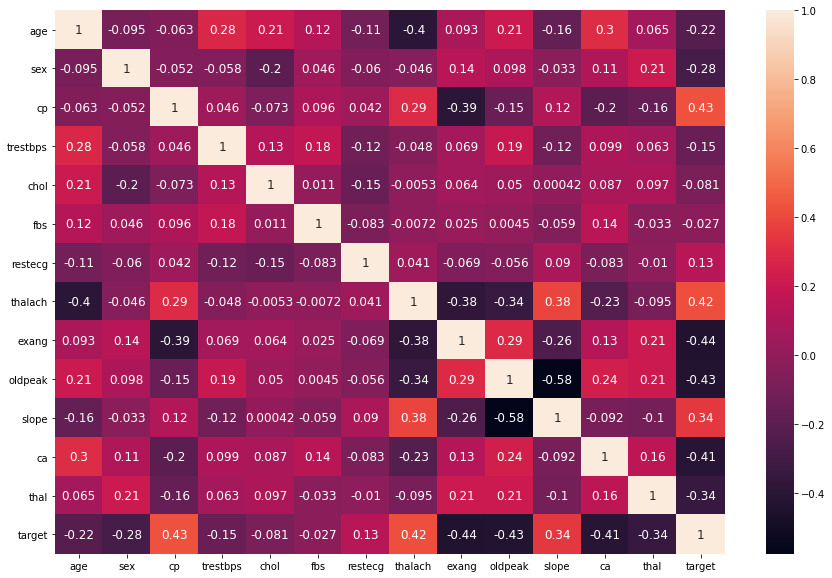

In [5]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, annot_kws = {"size":12})

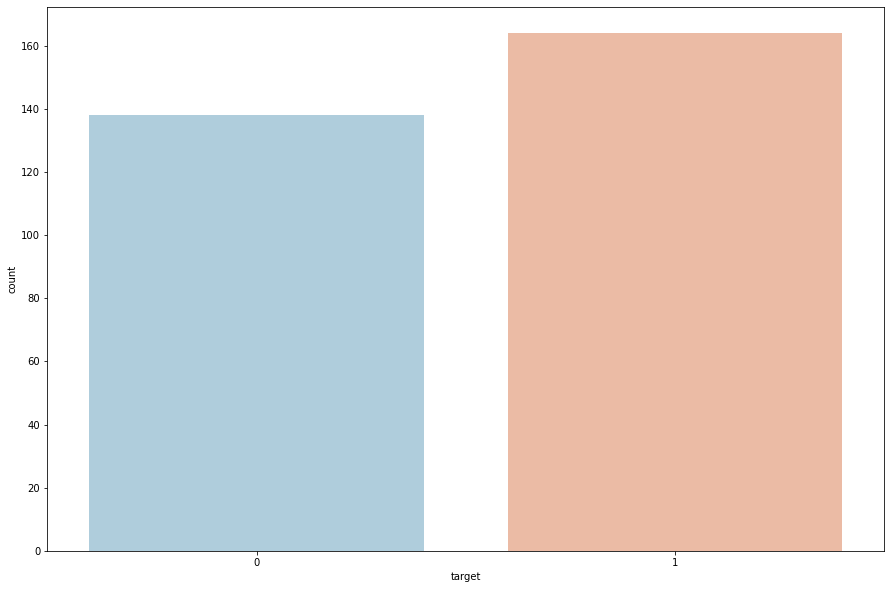

In [6]:
plt.figure(figsize = (15,10))
sns.countplot(x = "target", data = df, palette = "RdBu_r")

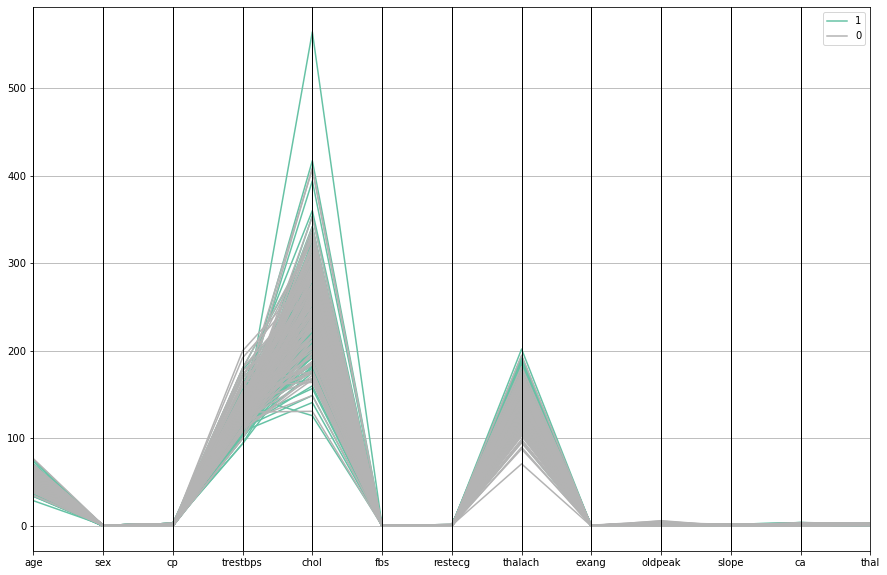

In [7]:
plt.figure(figsize = (15,10))
parallel_coordinates(df, 'target', colormap=plt.get_cmap("Set2"))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8420DC1F0>,
      dtype=object)

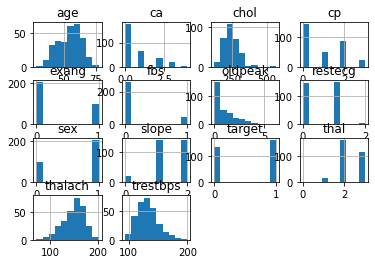

In [8]:
df.hist()

In [9]:
fig, ax=plt.subplots(5,3,figsize=(20,28))
sns.distplot(df['age'],bins=10,ax=ax[0,0],axlabel='Age Distribution')
sns.countplot(x="sex", data=df,ax=ax[0,1])
sns.countplot(x="cp", data=df,ax=ax[0,2])
sns.distplot(df['trestbps'],bins=10,ax=ax[1,0],axlabel='resting blood pressure')
sns.distplot(df['chol'],bins=10,ax=ax[1,1],axlabel='serum cholestoral in mg/dl')
sns.countplot(x="fbs", data=df,ax=ax[1,2])
sns.countplot(x="restecg", data=df,ax=ax[2,0])
sns.distplot(df['thalach'],bins=10,ax=ax[2,1],axlabel='maximum heart rate achieved')
sns.countplot(x="exang", data=df,ax=ax[2,2])
sns.distplot(df['oldpeak'],bins=10,ax=ax[3,0],axlabel='ST depression induced by exercise relative to rest')
sns.countplot(x='slope',data=df,ax=ax[3,1])
sns.countplot(x='ca',data=df,ax=ax[3,2])
sns.countplot(x='thal',data=df,ax=ax[4,0])
sns.countplot(x='target',data=df,ax=ax[4,1])
sns.countplot(x='target',hue='sex',data=heart,palette='rainbow')
ax[4,2].set_title('Sex: Female v Male')
ax[4,1].set_title('target')
ax[4,0].set_title('thal')
ax[3,2].set_title('number of major vessels (0-3) colored by flourosopy')
ax[3,1].set_title('the slope of the peak exercise ST segment')
ax[2,2].set_title('exercise induced angina')
ax[1,2].set_title("fasting blood sugar > 120 mg/dl")
ax[0,2].set_title("chest pain type")
ax[2,0].set_title('resting electrocardiographic results')

Text(0.5, 1.0, 'resting electrocardiographic results')

# Finding and Removing Outliers

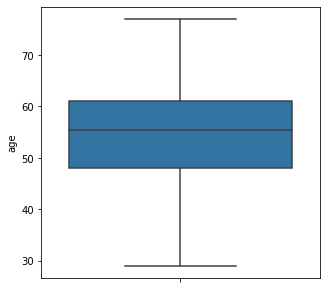

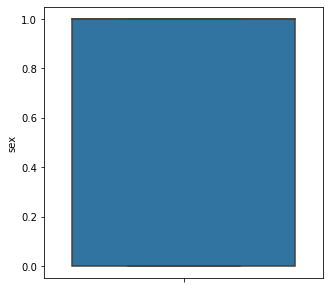

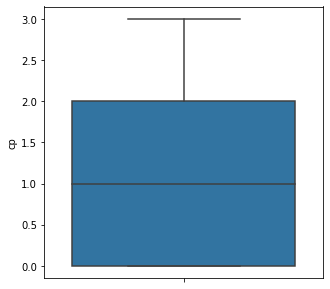

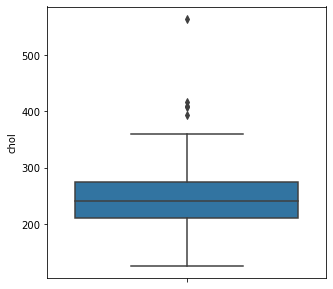

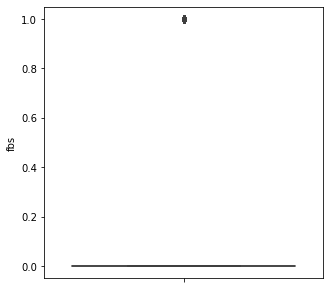

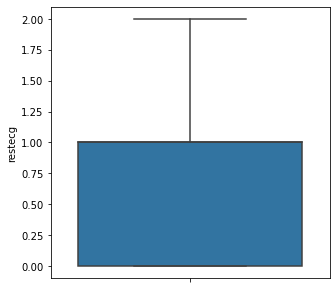

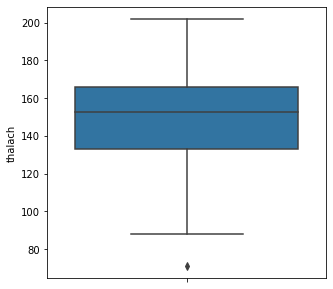

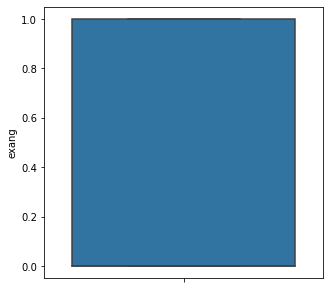

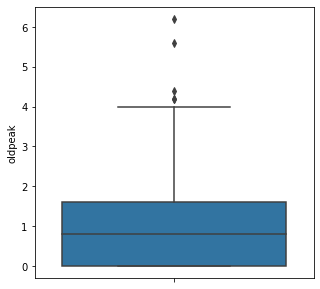

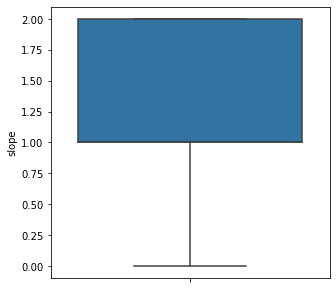

In [10]:
for column in heart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = heart[column])

In [11]:
Q1 = np.percentile(heart.age, 25)  
Q3 = np.percentile(heart.age, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.age: 
    if (x<low_lim) or (x>up_lim):
        heart['age'] = heart['age'].replace({x:heart.age.mean()}) 

Q1 = np.percentile(heart.trestbps, 25)  
Q3 = np.percentile(heart.trestbps, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.trestbps: 
    if (x<low_lim) or (x>up_lim):
        heart['trestbps'] = heart['trestbps'].replace({x:heart.trestbps.mean()}) 
       

Q1 = np.percentile(heart.chol, 25)  
Q3 = np.percentile(heart.chol, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.chol: 
    if (x<low_lim) or (x>up_lim):
        heart['chol'] = heart['chol'].replace({x:heart.chol.mean()}) 
       

Q1 = np.percentile(heart.thalach, 40)  
Q3 = np.percentile(heart.thalach, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thalach: 
    if (x<low_lim) or (x>up_lim):
        heart['thalach'] = heart['thalach'].replace({x:heart.thalach.mean()}) 
        

Q1 = np.percentile(heart.oldpeak, 25)  
Q3 = np.percentile(heart.oldpeak, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.oldpeak: 
    if (x<low_lim) or (x>up_lim):
        heart['oldpeak'] = heart['oldpeak'].replace({x:heart.oldpeak.mean()})
        
Q1 = np.percentile(heart.ca, 25)  
Q3 = np.percentile(heart.ca, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.ca: 
    if (x<low_lim) or (x>up_lim):
        heart['ca'] = heart['ca'].replace({x:heart.ca.mean()})

Q1 = np.percentile(heart.thal, 25)  
Q3 = np.percentile(heart.thal, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thal: 
    if (x<low_lim) or (x>up_lim):
        heart['thal'] = heart['thal'].replace({x:heart.thal.mean()})

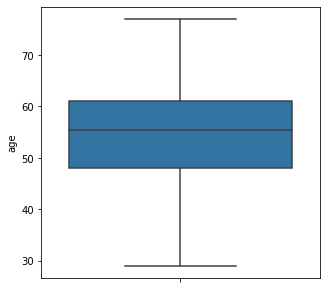

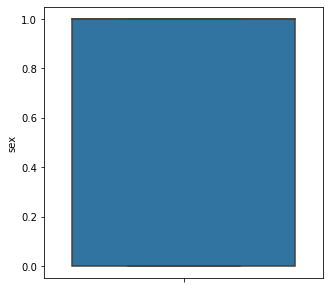

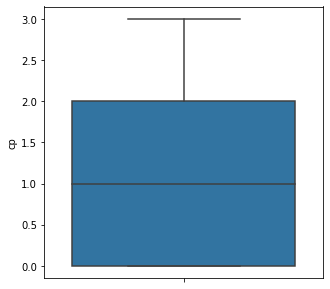

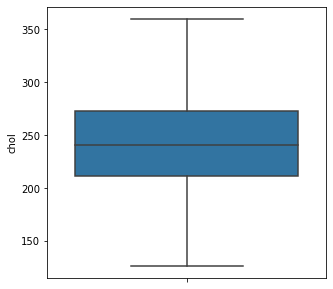

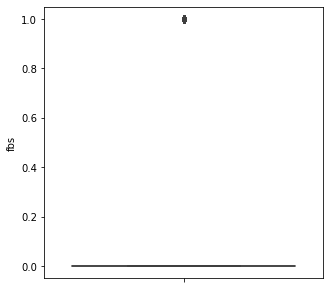

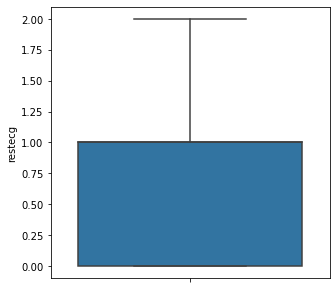

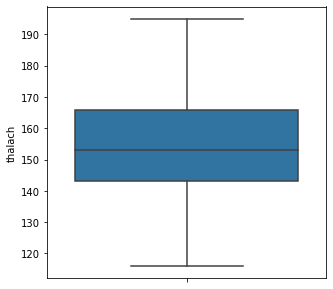

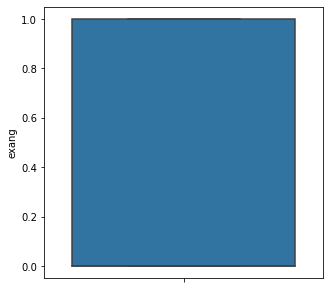

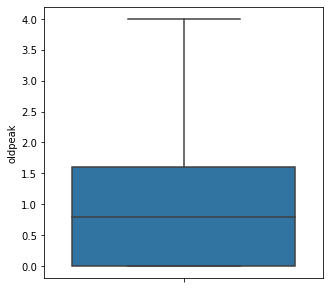

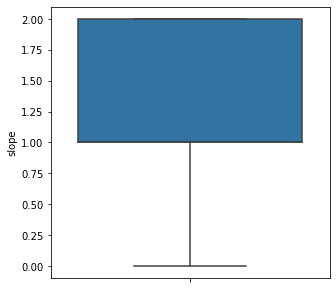

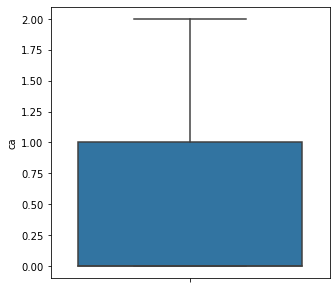

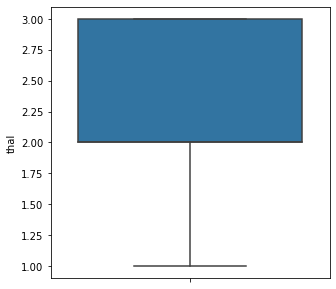

In [12]:
meanheart = pd.DataFrame(heart)
for column in meanheart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = meanheart[column])

In [13]:
heart = pd.read_csv("E:/heart.csv")

In [14]:
Q1 = np.percentile(heart.age, 25)  
Q3 = np.percentile(heart.age, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.age: 
    if (x<low_lim) or (x>up_lim):
        heart['age'] = heart['age'].replace({x:heart.age.median()}) 

Q1 = np.percentile(heart.trestbps, 25)  
Q3 = np.percentile(heart.trestbps, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.trestbps: 
    if (x<low_lim) or (x>up_lim):
        heart['trestbps'] = heart['trestbps'].replace({x:heart.trestbps.median()}) 
       

Q1 = np.percentile(heart.chol, 25)  
Q3 = np.percentile(heart.chol, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.chol: 
    if (x<low_lim) or (x>up_lim):
        heart['chol'] = heart['chol'].replace({x:heart.chol.median()}) 
       

Q1 = np.percentile(heart.thalach, 40)  
Q3 = np.percentile(heart.thalach, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thalach: 
    if (x<low_lim) or (x>up_lim):
        heart['thalach'] = heart['thalach'].replace({x:heart.thalach.median()}) 
        

Q1 = np.percentile(heart.oldpeak, 25)  
Q3 = np.percentile(heart.oldpeak, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.oldpeak: 
    if (x<low_lim) or (x>up_lim):
        heart['oldpeak'] = heart['oldpeak'].replace({x:heart.oldpeak.median()})
        
Q1 = np.percentile(heart.ca, 25)  
Q3 = np.percentile(heart.ca, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.ca: 
    if (x<low_lim) or (x>up_lim):
        heart['ca'] = heart['ca'].replace({x:heart.ca.median()})

Q1 = np.percentile(heart.thal, 25)  
Q3 = np.percentile(heart.thal, 75) 
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
for x in heart.thal: 
    if (x<low_lim) or (x>up_lim):
        heart['thal'] = heart['thal'].replace({x:heart.thal.median()})

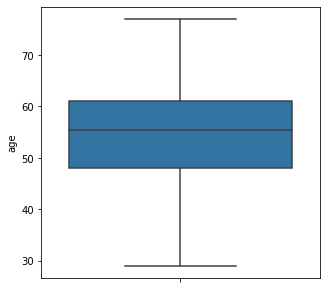

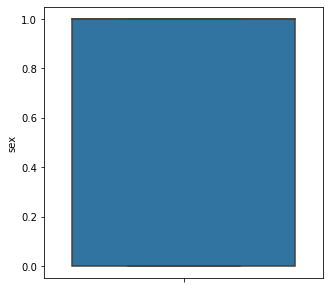

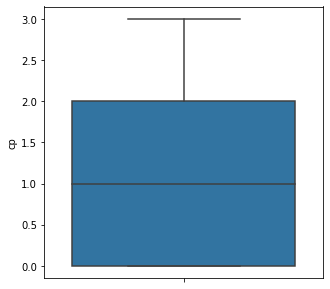

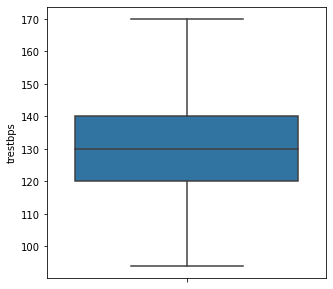

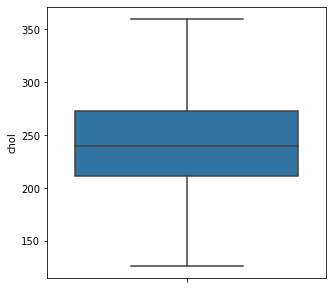

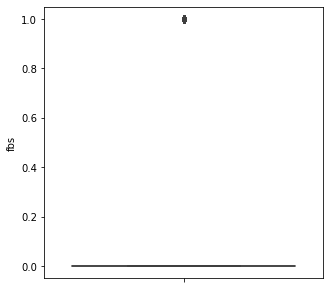

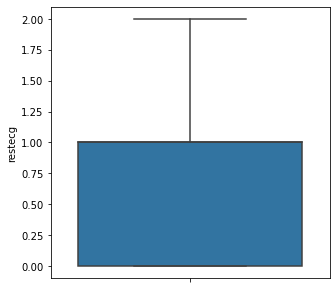

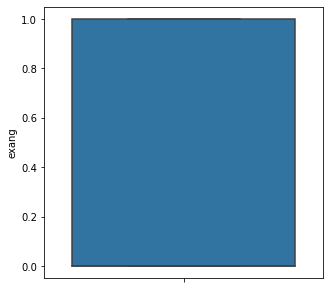

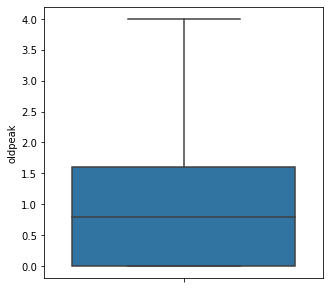

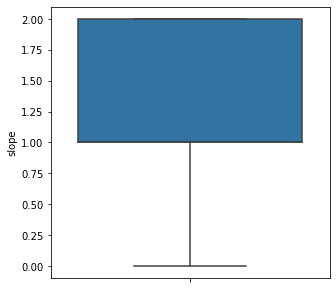

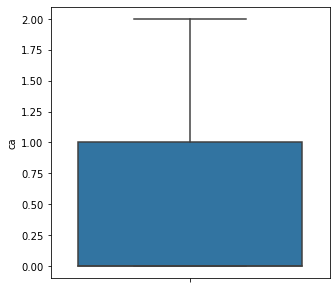

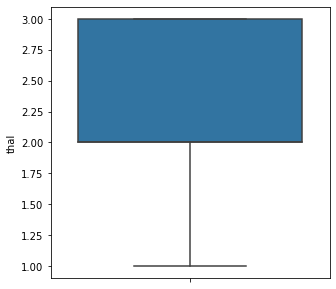

In [15]:
medianheart = pd.DataFrame(heart)
for column in medianheart.drop("target", axis = 1).columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = medianheart[column])

MODE DOES NOT REMOVE OUTLIERS FOR THIS PARTICULAR DATA SET

# Scaling

In [16]:
df_scaled = pd.DataFrame(preprocessing.scale(df.drop("target", axis = 1)), columns = df.drop("target", axis = 1).columns).join(df.target)
meanheart = pd.DataFrame(preprocessing.scale(meanheart.drop("target", axis = 1)), columns = meanheart.drop("target", axis = 1).columns).join(meanheart.target)
medianheart = pd.DataFrame(preprocessing.scale(medianheart.drop("target", axis = 1)), columns = medianheart.drop("target", axis = 1).columns).join(medianheart.target)

In [17]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   57    0   0       140   241    0        1      123      1      0.2   
298   45    1   3       110   264    0        1      132      0      1.2   
299   68    1   0       144   193    1        1      141      0      3.4   
300   57    1   0       130   131    0        1      115      1      1.2   
301   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
297      1   0     3       0  
298      1   0     3       0  
299      1   2     3       0  
300      1   1     3       0  
301      1   1     2       0  

[302 rows x 14 columns]

In [18]:
meanheart

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.949794  0.682656  1.976470  0.985321 -0.231281  2.389793 -1.002541   
1   -1.928548  0.682656  1.005911 -0.006447  0.150327 -0.418446  0.901657   
2   -1.485726 -1.464866  0.035352 -0.006447 -0.882260 -0.418446 -1.002541   
3    0.174856  0.682656  0.035352 -0.667625 -0.163938 -0.418446  0.901657   
4    0.285561 -1.464866 -0.935208 -0.667625  2.484872 -0.418446  0.901657   
..        ...       ...       ...       ...       ...       ...       ...   
297  0.285561 -1.464866 -0.935208  0.654731 -0.051700 -0.418446  0.901657   
298 -1.042904  0.682656  1.976470 -1.328803  0.464593 -0.418446  0.901657   
299  1.503322  0.682656 -0.935208  0.919203 -1.129183  2.389793  0.901657   
300  0.285561  0.682656 -0.935208 -0.006447 -2.520931 -0.418446  0.901657   
301  0.285561 -1.464866  0.035352 -0.006447 -0.163938 -0.418446 -1.002541   

      thalach     exang   oldpeak     slope        ca      thal  target  
0   -0.236037 -0.698344  1.271501 -2.271182 -0.749898 -2.284648       1  
1    1.945672 -0.698344  2.426087 -2.271182 -0.749898 -0.566735       1  
2    1.061195 -0.698344  0.405561  0.979514 -0.749898 -0.566735       1  
3    1.414986 -0.698344 -0.171732  0.979514 -0.749898 -0.566735       1  
4    0.530509  1.431958 -0.364163  0.979514 -0.749898 -0.566735       1  
..        ...       ...       ...       ...       ...       ...     ...  
297 -1.828094  1.431958 -0.749025 -0.645834 -0.749898  1.151177       0  
298 -1.297408 -0.698344  0.213130 -0.645834 -0.749898  1.151177       0  
299 -0.766723 -0.698344  2.329872 -0.645834  2.123334  1.151177       0  
300 -0.240584  1.431958  0.213130 -0.645834  0.686718  1.151177       0  
301  1.179126 -0.698344 -0.941456 -0.645834  0.686718 -0.566735       0  

[302 rows x 14 columns]

In [19]:
medianheart

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.949794  0.682656  1.976470  0.987461 -0.229448  2.389793 -1.002541   
1   -1.928548  0.682656  1.005911 -0.004379  0.152152 -0.418446  0.901657   
2   -1.485726 -1.464866  0.035352 -0.004379 -0.880413 -0.418446 -1.002541   
3    0.174856  0.682656  0.035352 -0.665606 -0.162107 -0.418446  0.901657   
4    0.285561 -1.464866 -0.935208 -0.665606  2.486647 -0.418446  0.901657   
..        ...       ...       ...       ...       ...       ...       ...   
297  0.285561 -1.464866 -0.935208  0.656848 -0.049872 -0.418446  0.901657   
298 -1.042904  0.682656  1.976470 -1.326832  0.466411 -0.418446  0.901657   
299  1.503322  0.682656 -0.935208  0.921338 -1.127331  2.389793  0.901657   
300  0.285561  0.682656 -0.935208 -0.004379 -2.519050 -0.418446  0.901657   
301  0.285561 -1.464866  0.035352 -0.004379 -0.162107 -0.418446 -1.002541   

      thalach     exang   oldpeak     slope        ca      thal  target  
0   -0.245430 -0.698344  1.274733 -2.271182 -0.659910 -2.278667       1  
1    1.939261 -0.698344  2.429065 -2.271182 -0.659910 -0.562564       1  
2    1.053575 -0.698344  0.408985  0.979514 -0.659910 -0.562564       1  
3    1.407849 -0.698344 -0.168181  0.979514 -0.659910 -0.562564       1  
4    0.522164  1.431958 -0.360569  0.979514 -0.659910 -0.562564       1  
..        ...       ...       ...       ...       ...       ...     ...  
297 -1.839665  1.431958 -0.745346 -0.645834 -0.659910  1.153539       0  
298 -1.308253 -0.698344  0.216596 -0.645834 -0.659910  1.153539       0  
299 -0.776842 -0.698344  2.332870 -0.645834  2.166937  1.153539       0  
300 -0.083055  1.431958  0.216596 -0.645834  0.753514  1.153539       0  
301  1.171666 -0.698344 -0.937735 -0.645834  0.753514 -0.562564       0  

[302 rows x 14 columns]

# Models
## LOGISTIC REGRESSION
### Mean

In [20]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.4,random_state=42)

logreg = LogisticRegression(max_iter=3000) # set the max iteration to be 3000 otherwise the process can't be finished
logreg.fit(X_train,y_train)
print ("Trained Model:", logreg, "\n")

y_pred = logreg.predict(X_test)

# view the model's score, which will indicate how good my model has been trained
print("Score : ", accuracy_score(y_test, y_pred, normalize = True))

Trained Model: LogisticRegression(max_iter=3000) 

Score :  0.8512396694214877


In [21]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = logreg.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[1.   0.  ]
 [0.79 0.21]
 [0.27 0.73]
 [0.59 0.41]
 [0.07 0.93]
 [0.03 0.97]
 [0.48 0.52]
 [1.   0.  ]
 [1.   0.  ]
 [0.81 0.19]
 [0.13 0.87]
 [0.61 0.39]
 [0.06 0.94]
 [0.99 0.01]
 [0.01 0.99]
 [0.03 0.97]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.33 0.67]
 [0.99 0.01]
 [0.39 0.61]
 [0.64 0.36]
 [0.15 0.85]
 [0.44 0.56]
 [0.99 0.01]
 [0.34 0.66]
 [1.   0.  ]
 [0.06 0.94]
 [0.98 0.02]
 [0.99 0.01]
 [0.75 0.25]
 [0.88 0.12]
 [0.08 0.92]
 [0.99 0.01]
 [0.17 0.83]
 [0.38 0.62]
 [0.12 0.88]
 [0.13 0.87]
 [0.05 0.95]
 [0.12 0.88]
 [0.08 0.92]
 [0.2  0.8 ]
 [0.18 0.82]
 [0.58 0.42]
 [0.67 0.33]
 [0.02 0.98]
 [0.98 0.02]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.07 0.93]
 [0.03 0.97]
 [1.   0.  ]
 [0.94 0.06]
 [0.99 0.01]
 [0.02 0.98]
 [1.   0.  ]
 [0.31 0.69]
 [0.74 0.26]
 [0.06 0.94]
 [0.72 0.28]
 [0.99 0.01]
 [0.15 0.85]
 [0.03 0.97]
 [0.43 0.57]
 [0.32 0.68]
 [0.21 0.79]
 [0.99 0.01]
 [0.06 0.94]
 [0.12 0.88]
 [0.49 0.51]
 [0.12 0.88]
 [0.99 0.01]
 [0.07 0.93]
 [0.51 0.49]

In [22]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

Confusion matrix, without normalization
[[44  8]
 [10 59]]
Normalized confusion matrix
[[0.85 0.15]
 [0.14 0.86]]


In [23]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8512396694214877
recall: 0.855072463768116
precision: 0.8805970149253731
f1: 0.8676470588235295


#### ROC AUC 

In [24]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 179    0
228    0
111    1
246    0
60     1
      ..
183    0
148    1
86     1
253    0
288    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[1.   0.  ]
 [0.79 0.21]
 [0.27 0.73]
 [0.59 0.41]
 [0.07 0.93]
 [0.03 0.97]
 [0.48 0.52]
 [1.   0.  ]
 [1.   0.  ]
 [0.81 0.19]
 [0.13 0.87]
 [0.61 0.39]
 [0.06 0.94]
 [0.99 0.01]
 [0.01 0.99]
 [0.03 0.97]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.33 0.67]
 [0.99 0.01]
 [0.39 0.61]
 [0.64 0.36]
 [0.15 0.85]
 [0.44 0.56]
 [0.99 0.01]
 [0.34 0.66]
 [1.   0.  ]
 [0.06 0.94]
 [0.98 0.02]
 [0.99 0.01]
 [0.75 0.25]
 [0.88 0.12]
 [0.08 0.92]
 [0.99 0.01]
 [0.17 0.83]
 [0.38 0.62]
 [0.12 0.88]
 [0.13 0.87]
 [0.05 0.95]
 [0.12 0.88]
 [0.08 0.92]
 [0.2  0.8 ]
 [0.18 0.82]
 [0.58 0.42]
 [0.67 0.33]
 [0.02 0.98]
 [0.98 0.02]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.07 0.93]
 [0.03 0.97]
 [1.   0.  ]
 [0.94 0.06]
 [0.99 0.01]
 [0.02 0.98]
 [1.   0.  ]
 [0.31 0.69]
 [0.74 0.26]
 [0.06 0.94]
 [0.72 0.28]
 [0.99 0.01]
 [0.15 

In [25]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 69
Negative count: 52
Count: 121
True Positive (TP, sensativity): 59 (85%)
True Negative (TN, specificity): 44 (84%)
False Positive (FP): 8 (15%)
False Negative (FN): 10 (14%)


In [26]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8512396694214877
recall: 0.855072463768116
precision: 0.8805970149253731
f1: 0.8676470588235295


Confusion matrix, without normalization
[[44  8]
 [10 59]]
Normalized confusion matrix
[[0.85 0.15]
 [0.14 0.86]]


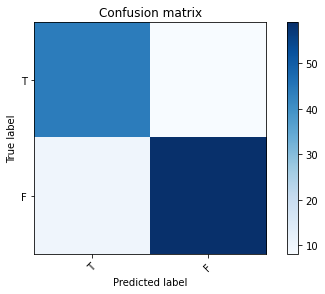

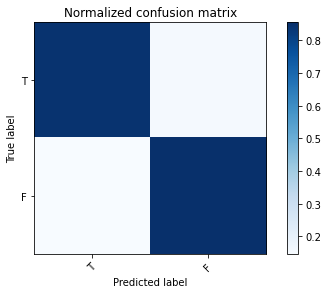

In [27]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [28]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 1 0 0]
Y_HAT: [0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 0]
FPR: [0.   0.   0.   0.02 0.04 0.04 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.08 0.08 0.1  0.1  0.1  0.12 0.12 0.13 0.13 0.17 0.17 0.21 0.21
 0.23 0.25 0.25 0.33 0.35 0.35 0.37 0.37 0.42 0.54 0.79 1.  ]
TPR: [0.   0.03 0.07 0.12 0.22 0.23 0.26 0.32 0.41 0.46 0.49 0.51 0.55 0.61
 0.64 0.64 0.7  0.7  0.74 0.8  0.81 0.83 0.83 0.86 0.86 0.88 0.88 0.9
 0.91 0.91 0.94 0.94 0.96 0.97 0.97 0.99 0.99 1.   1.   1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.92 0.88 0.87 0.86 0.85 0

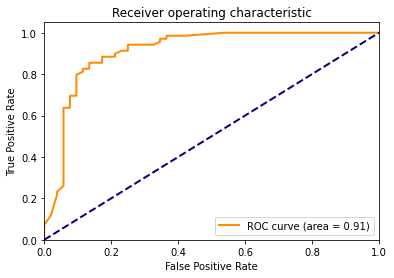

In [29]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [30]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.   0.   0.02 0.04 0.04 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06
 0.06 0.08 0.08 0.1  0.1  0.1  0.12 0.12 0.13 0.13 0.17 0.17 0.21 0.21
 0.23 0.25 0.25 0.33 0.35 0.35 0.37 0.37 0.42 0.54 0.79 1.  ]
TPR: [0.   0.03 0.07 0.12 0.22 0.23 0.26 0.32 0.41 0.46 0.49 0.51 0.55 0.61
 0.64 0.64 0.7  0.7  0.74 0.8  0.81 0.83 0.83 0.86 0.86 0.88 0.88 0.9
 0.91 0.91 0.94 0.94 0.96 0.97 0.97 0.99 0.99 1.   1.   1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.92 0.88 0.87 0.86 0.85 0.8
 0.79 0.78 0.71 0.69 0.68 0.62 0.61 0.57 0.56 0.52 0.49 0.43 0.41 0.39
 0.36 0.33 0.29 0.21 0.2  0.19 0.15 0.12 0.03 0.02 0.01 0.  ]


In [31]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.12 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 179    0
228    0
111    1
246    0
60     1
      ..
183    0
148    1
86     1
253    0
288    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[1.   0.  ]
 [0.79 0.21]
 [0.27 0.73]
 [0.59 0.41]
 [0.07 0.93]
 [0.03 0.97]
 [0.48 0.52]
 [1.   0.  ]
 [1.   0.  ]
 [0.81 0.19]
 [0.13 0.87]
 [0.61 0.39]
 [0.06 0.94]
 [0.99 0.01]
 [0.01 0.99]
 [0.03 0.97]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.33 0.67]
 [0.99 0.01]
 [0.39 0.61]
 [0.64 0.36]
 [0.15 0.85]
 [0.44 0.56]
 [0.99 0.01]
 [0.34 0.66]
 [1.   0.  ]
 [0.06 0.94]
 [0.98 0.02]
 [0.99 0.01]
 [0.75 0.25]
 [0.88 0.12]
 [0.08 0.92]
 [0.99 0.01]
 [0.17 0.83]
 [0.38 0.62]
 [0.12 0.88]
 [0.13 0.87]
 [0.05 0.95]
 [0.12 0.88]
 [0.08 0.92]
 [0.2  0.8 ]
 [0.18 0.82]
 [0.58 0.42]
 [0.67 0.33]
 [0.02 0.98]
 [0.98 0.02]
 [0.99 0.01]
 [0.98 0.02]
 [1.   0.  ]
 [0.07 0.93]
 [0.03 0.97]
 [1.   0.  ]
 [0.94 0.06]
 [0.99 0.01]
 [0.02 0.98]
 [1.   0.  ]
 [0.31 0.69]
 [0.74 0.26]
 [0.06 0.94]
 [0.72 0.28]
 [0.99 0.01]
 [0.15 

In [32]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 69
Negative count: 52
Count: 121
True Positive (TP, sensativity): 68 (98%)
True Negative (TN, specificity): 33 (63%)
False Positive (FP): 19 (36%)
False Negative (FN): 1 (1%)


In [33]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8347107438016529
recall: 0.9855072463768116
precision: 0.7816091954022989
f1: 0.8717948717948718


Confusion matrix, without normalization
[[33 19]
 [ 1 68]]
Normalized confusion matrix
[[0.63 0.37]
 [0.01 0.99]]


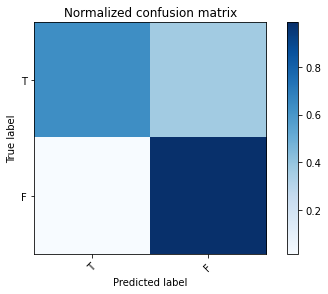

In [34]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [35]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [36]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.05 0.2  0.79 0.56 0.91 0.95 0.68 0.08 0.01 0.24 0.82 0.34 0.96 0.01
 0.82 0.91 0.89 0.03 0.01 0.01 0.82 0.01 0.62 0.22 0.8  0.57 0.01 0.7
 0.01 0.91 0.01 0.2  0.25 0.01 0.99 0.01 0.85 0.42 0.75 0.89 0.99 0.9
 0.91 0.77 0.67 0.35 0.28 0.99 0.05 0.01 0.05 0.01 0.86 0.99 0.1  0.15
 0.01 0.95 0.03 0.79 0.21 0.92 0.17 0.01 0.93 0.99 0.56 0.78 0.83 0.01
 0.98 0.99 0.51 0.99 0.01 0.99 0.5  0.75 0.01 0.01 0.01 0.19 0.76 0.76
 0.55 0.01 0.11 0.79 0.25 0.48 0.98 0.99 0.79 0.94 0.71 0.8  0.82 0.32
 0.96 0.96 0.54 0.96 0.82 0.28 0.18 0.96 0.99 0.99 0.56 0.09 0.78 0.01
 0.01 0.96 0.01 0.71 0.02 0.87 0.56 0.99 0.11 0.01 0.35 0.59 0.47 0.99
 0.87 0.46 0.01 0.01 0.03 0.88 0.28 0.99 0.01 0.99 0.89 0.96 0.08 0.01
 0.03 0.8  0.01 0.63 0.39 0.93 0.44 0.01 0.71 0.03 0.97 0.05 0.01 0.27
 0.15 0.85 0.2  0.88 0.5  0.95 0.77 0.99 0.99 0.84 0.9  0.86 0.5  0.52
 0.96 0.01 0.01 0.01 0.01 0.96 0.99 0.08 0.06 0.16 0.95 0.27 0.75 0.17
 0.83 0.33 0.01 0.92 0.99 0.56 0.6  0.64 0.01 0.99 0.9  0.39 0.9  0.05
 0.84 0.

In [37]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
231  1   0.99       1
65   0   0.99       1
91   1   0.99       1
424  1   0.99       1
397  1   0.99       1
..  ..    ...     ...
233  0   0.01      10
250  0   0.01      10
255  0   0.01      10
260  0   0.01      10
170  0   0.01      10

[484 rows x 3 columns]

In [38]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       42   49.0
2       47   48.0
3       45   48.0
4       44   49.0
5       38   48.0
6       30   48.0
7       20   49.0
8        4   48.0
9        3   48.0
10       3   49.0

In [39]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       42   49.0  0.857143
2       47   48.0  0.979167
3       45   48.0  0.937500
4       44   49.0  0.897959
5       38   48.0  0.791667
6       30   48.0  0.625000
7       20   49.0  0.408163
8        4   48.0  0.083333
9        3   48.0  0.062500
10       3   49.0  0.061224

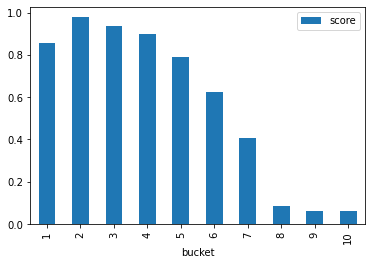

In [40]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [41]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [42]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.379049368470849


### Median

In [43]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.2,random_state=42)

logreg = LogisticRegression(max_iter=3000) # set the max iteration to be 3000 otherwise the process can't be finished
logreg.fit(X_train,y_train)
print ("Trained Model:", logreg, "\n")

y_pred = logreg.predict(X_test)

# view the model's score, which will indicate how good my model has been trained
print("Score : ", accuracy_score(y_test, y_pred, normalize = True))

Trained Model: LogisticRegression(max_iter=3000) 

Score :  0.8524590163934426


In [44]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = logreg.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[1.   0.  ]
 [0.88 0.12]
 [0.15 0.85]
 [0.85 0.15]
 [0.04 0.96]
 [0.03 0.97]
 [0.41 0.59]
 [0.99 0.01]
 [1.   0.  ]
 [0.88 0.12]
 [0.17 0.83]
 [0.74 0.26]
 [0.09 0.91]
 [0.97 0.03]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.49 0.51]
 [0.98 0.02]
 [0.36 0.64]
 [0.62 0.38]
 [0.13 0.87]
 [0.36 0.64]
 [0.99 0.01]
 [0.39 0.61]
 [1.   0.  ]
 [0.03 0.97]
 [0.98 0.02]
 [0.98 0.02]
 [0.7  0.3 ]
 [0.82 0.18]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.16 0.84]
 [0.37 0.63]
 [0.16 0.84]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.18 0.82]
 [0.07 0.93]
 [0.23 0.77]
 [0.16 0.84]
 [0.4  0.6 ]
 [0.59 0.41]
 [0.01 0.99]
 [0.96 0.04]
 [0.99 0.01]
 [0.92 0.08]
 [1.   0.  ]
 [0.14 0.86]
 [0.03 0.97]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.31 0.69]
 [0.7  0.3 ]] 



Confusion matrix, without normalization
[[25  4]
 [ 5 27]]
Normalized confusion matrix
[[0.86 0.14]
 [0.16 0.84]]


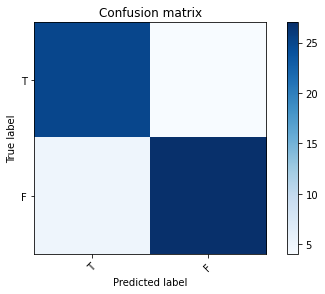

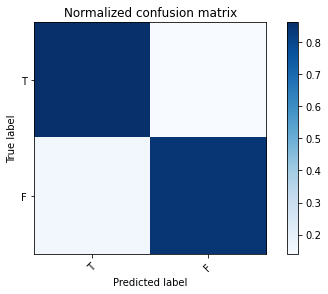

In [45]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [46]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8524590163934426
recall: 0.84375
precision: 0.8709677419354839
f1: 0.8571428571428571


#### ROC AUC 

In [47]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
299    0
193    0
184    0
Name: target, Length: 61, dtype: int64
y_pred_proba: [[1.   0.  ]
 [0.88 0.12]
 [0.15 0.85]
 [0.85 0.15]
 [0.04 0.96]
 [0.03 0.97]
 [0.41 0.59]
 [0.99 0.01]
 [1.   0.  ]
 [0.88 0.12]
 [0.17 0.83]
 [0.74 0.26]
 [0.09 0.91]
 [0.97 0.03]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.49 0.51]
 [0.98 0.02]
 [0.36 0.64]
 [0.62 0.38]
 [0.13 0.87]
 [0.36 0.64]
 [0.99 0.01]
 [0.39 0.61]
 [1.   0.  ]
 [0.03 0.97]
 [0.98 0.02]
 [0.98 0.02]
 [0.7  0.3 ]
 [0.82 0.18]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.16 0.84]
 [0.37 0.63]
 [0.16 0.84]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.18 0.82]
 [0.07 0.93]
 [0.23 0.77]
 [0.16 0.84]
 [0.4  0.6 ]
 [0.59 0.41]
 [0.01 0.99]
 [0.96 0.04]
 [0.99 0.01]
 [0.92 0.08]
 [1.   0.  ]
 [0.14 0.86]
 [0.03 0.97]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.31 0.69]
 [0.7  0.3 ]]
y: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 

In [48]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 32
Negative count: 29
Count: 61
True Positive (TP, sensativity): 27 (84%)
True Negative (TN, specificity): 25 (86%)
False Positive (FP): 4 (13%)
False Negative (FN): 5 (15%)


In [49]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8524590163934426
recall: 0.84375
precision: 0.8709677419354839
f1: 0.8571428571428571


Confusion matrix, without normalization
[[25  4]
 [ 5 27]]
Normalized confusion matrix
[[0.86 0.14]
 [0.16 0.84]]


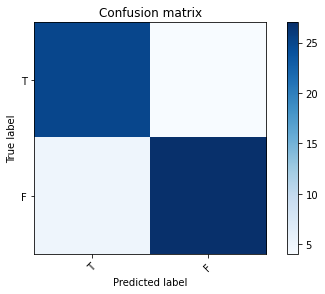

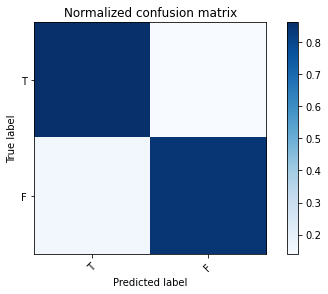

In [50]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [51]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0]
Y_HAT: [0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0]
FPR: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.1  0.1  0.14 0.14
 0.17 0.17 0.24 0.24 0.28 0.31 0.38 0.45 0.55 0.72 1.  ]
TPR: [0.   0.06 0.12 0.22 0.38 0.44 0.53 0.62 0.72 0.72 0.72 0.78 0.78 0.84
 0.84 0.88 0.88 0.94 0.94 0.97 0.97 0.97 1.   1.   1.  ]
thresholds: [2.   1.   0.98 0.97 0.91 0.9  0.85 0.84 0.77 0.69 0.64 0.61 0.6  0.51
 0.41 0.38 0.3  0.18 0.15 0.12 0.08 0.03 0.02 0.01 0.  ]
Optimal threshold index: 8
Optimal threshold value: 0.77
AUC: 0.939655172413793


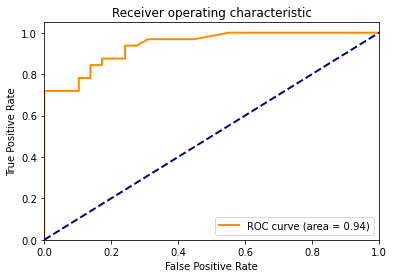

In [52]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [53]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.03 0.1  0.1  0.14 0.14
 0.17 0.17 0.24 0.24 0.28 0.31 0.38 0.45 0.55 0.72 1.  ]
TPR: [0.   0.06 0.12 0.22 0.38 0.44 0.53 0.62 0.72 0.72 0.72 0.78 0.78 0.84
 0.84 0.88 0.88 0.94 0.94 0.97 0.97 0.97 1.   1.   1.  ]
thresholds: [2.   1.   0.98 0.97 0.91 0.9  0.85 0.84 0.77 0.69 0.64 0.61 0.6  0.51
 0.41 0.38 0.3  0.18 0.15 0.12 0.08 0.03 0.02 0.01 0.  ]


In [54]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.27 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
299    0
193    0
184    0
Name: target, Length: 61, dtype: int64
y_pred_proba: [[1.   0.  ]
 [0.88 0.12]
 [0.15 0.85]
 [0.85 0.15]
 [0.04 0.96]
 [0.03 0.97]
 [0.41 0.59]
 [0.99 0.01]
 [1.   0.  ]
 [0.88 0.12]
 [0.17 0.83]
 [0.74 0.26]
 [0.09 0.91]
 [0.97 0.03]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [0.49 0.51]
 [0.98 0.02]
 [0.36 0.64]
 [0.62 0.38]
 [0.13 0.87]
 [0.36 0.64]
 [0.99 0.01]
 [0.39 0.61]
 [1.   0.  ]
 [0.03 0.97]
 [0.98 0.02]
 [0.98 0.02]
 [0.7  0.3 ]
 [0.82 0.18]
 [0.1  0.9 ]
 [0.98 0.02]
 [0.16 0.84]
 [0.37 0.63]
 [0.16 0.84]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.18 0.82]
 [0.07 0.93]
 [0.23 0.77]
 [0.16 0.84]
 [0.4  0.6 ]
 [0.59 0.41]
 [0.01 0.99]
 [0.96 0.04]
 [0.99 0.01]
 [0.92 0.08]
 [1.   0.  ]
 [0.14 0.86]
 [0.03 0.97]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]
 [0.31 0.69]
 [0.7  0.3 ]]
y: [0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 

In [55]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 32
Negative count: 29
Count: 61
True Positive (TP, sensativity): 28 (87%)
True Negative (TN, specificity): 22 (75%)
False Positive (FP): 7 (24%)
False Negative (FN): 4 (12%)


In [56]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.819672131147541
recall: 0.875
precision: 0.8
f1: 0.8358208955223881


Confusion matrix, without normalization
[[22  7]
 [ 4 28]]
Normalized confusion matrix
[[0.76 0.24]
 [0.12 0.88]]


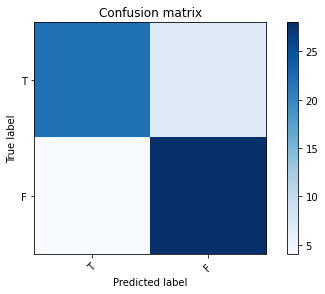

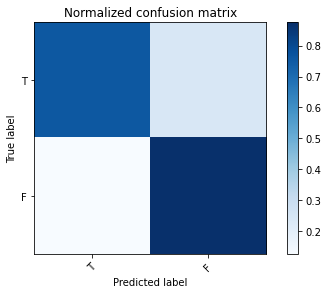

In [57]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [58]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [59]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.05 0.11 0.91 0.3  0.94 0.95 0.75 0.09 0.01 0.17 0.78 0.21 0.93 0.01
 0.83 0.89 0.9  0.03 0.01 0.01 0.66 0.01 0.65 0.24 0.82 0.65 0.01 0.65
 0.01 0.94 0.01 0.21 0.3  0.07 0.98 0.01 0.86 0.43 0.71 0.92 0.99 0.84
 0.92 0.74 0.69 0.53 0.36 0.99 0.07 0.01 0.11 0.01 0.79 0.99 0.1  0.17
 0.01 0.95 0.04 0.79 0.25 0.01 0.01 0.73 0.23 0.99 0.96 0.69 0.05 0.01
 0.16 0.98 0.26 0.99 0.01 0.99 0.96 0.97 0.01 0.01 0.01 0.55 0.17 0.59
 0.3  0.82 0.73 0.04 0.56 0.05 0.98 0.12 0.01 0.27 0.14 0.75 0.05 0.87
 0.63 0.82 0.76 0.88 0.79 0.85 0.75 0.88 0.79 0.43 0.99 0.03 0.01 0.08
 0.01 0.99 0.95 0.03 0.08 0.01 0.99 0.09 0.77 0.21 0.14 0.01 0.91 0.37
 0.86 0.91 0.6  0.01 0.01 0.13 0.72 0.31 0.82 0.18 0.92 0.92 0.99 0.01
 0.02 0.14 0.35 0.04 0.67 0.46 0.75 0.51 0.06 0.64 0.03 0.99 0.01 0.04
 0.33 0.11 0.99 0.07 0.72 0.7  0.74 0.98 0.99 0.74 0.99 0.81 0.92 0.79
 0.39 0.91 0.01 0.01 0.07 0.03 0.89 0.99 0.01 0.23 0.01 0.99 0.07 0.6
 0.19 0.05 0.1  0.92 0.2  0.95 0.89 0.44 0.01 0.09 0.14 0.71 0.28 0.95
 0.01 0

In [60]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
113  1   0.99       1
179  1   0.99       1
151  1   0.99       1
118  1   0.99       1
197  1   0.99       1
..  ..    ...     ...
123  0   0.01      10
214  0   0.01      10
139  0   0.01      10
176  0   0.01      10
170  0   0.01      10

[244 rows x 3 columns]

In [61]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       25   25.0
2       24   24.0
3       23   24.0
4       20   25.0
5       13   24.0
6       10   24.0
7        9   25.0
8        2   24.0
9        2   24.0
10       0   25.0

In [62]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       25   25.0  1.000000
2       24   24.0  1.000000
3       23   24.0  0.958333
4       20   25.0  0.800000
5       13   24.0  0.541667
6       10   24.0  0.416667
7        9   25.0  0.360000
8        2   24.0  0.083333
9        2   24.0  0.083333
10       0   25.0  0.000000

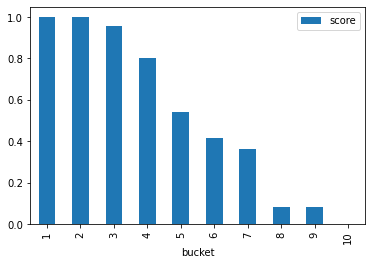

In [63]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

In [64]:
#### Log Loss

In [65]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [66]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.3365017438911693


## DECISION TREE
### Mean

In [67]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size = 0.4, random_state = 10)

dtree = DecisionTreeClassifier(random_state=17, max_depth=3, min_samples_leaf=2)
dtree.fit(X=X_train, y=y_train)

print("trained Model: ", dtree, "\n")

# Apply the learner to the new, unclassified observation.
y_pred = dtree.predict(X_test)
print(y_pred, "\n")

# view the model's score, which will indicate how good my model has been trained
print("Score: ", dtree.score(X_test, y_test))

trained Model:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=17) 

[0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 0 0 0 1 1 1 1 1 1] 

Score:  0.743801652892562


In [68]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = dtree.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.07 0.93]
 [0.07 0.93]
 [0.5  0.5 ]
 [0.98 0.02]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.71 0.29]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.71 0.29]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [1.   0.  ]
 [0.98 0.02]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.5  0.5 ]
 [0.07 0.93]
 [0.07 0.93]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.71 0.29]
 [0.05 0.95]
 [0.07 0.93]
 [0.05 0.95]
 [0.07 0.93]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.07 0.93]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.07 0.93]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.07 0.93]
 [0.71 0.29]
 [0.98 0.02]
 [0.07 0.93]
 [0.71 0.29]

Confusion matrix, without normalization
[[36 24]
 [ 7 54]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.11 0.89]]


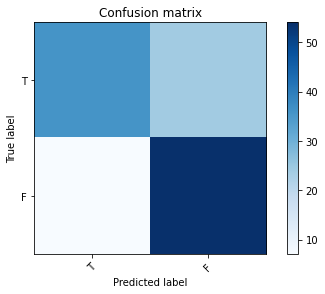

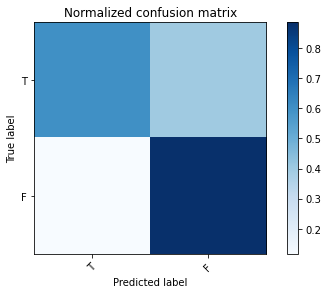

In [69]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [70]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.743801652892562
recall: 0.8852459016393442
precision: 0.6923076923076923
f1: 0.7769784172661871


#### ROC AUC 

In [71]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.07 0.93]
 [0.07 0.93]
 [0.5  0.5 ]
 [0.98 0.02]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.71 0.29]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.71 0.29]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [1.   0.  ]
 [0.98 0.02]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.5  0.5 ]
 [0.07 0.93]
 [0.07 0.93]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.71 0.29]
 [0.05 0.95]
 [0.07 0.93]
 [0.05 0.95]
 [0.07 0.93]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.07 

In [72]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 57 (93%)
True Negative (TN, specificity): 34 (56%)
False Positive (FP): 26 (43%)
False Negative (FN): 4 (6%)


In [73]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7520661157024794
recall: 0.9344262295081968
precision: 0.6867469879518072
f1: 0.7916666666666666


Confusion matrix, without normalization
[[34 26]
 [ 4 57]]
Normalized confusion matrix
[[0.57 0.43]
 [0.07 0.93]]


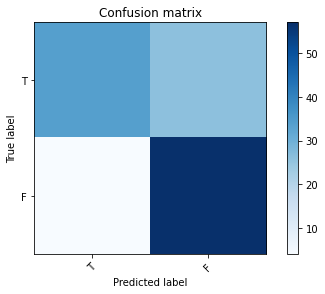

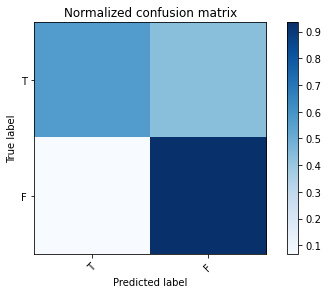

In [74]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [75]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0]
Y_HAT: [0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 1]
FPR: [0.   0.25 0.37 0.4  0.43 0.53 0.98 1.  ]
TPR: [0.   0.57 0.77 0.89 0.93 0.97 1.   1.  ]
thresholds: [1.95 0.95 0.93 0.7  0.5  0.29 0.02 0.  ]
Optimal threshold index: 4
Optimal threshold value: 0.5
AUC: 0.7624316939890711


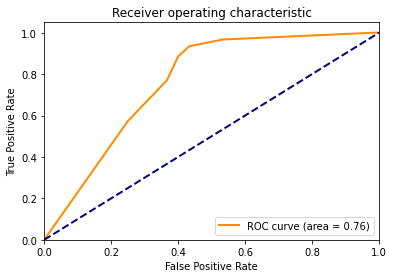

In [76]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [77]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.25 0.37 0.4  0.43 0.53 0.98 1.  ]
TPR: [0.   0.57 0.77 0.89 0.93 0.97 1.   1.  ]
thresholds: [1.95 0.95 0.93 0.7  0.5  0.29 0.02 0.  ]


In [78]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.07 0.93]
 [0.07 0.93]
 [0.5  0.5 ]
 [0.98 0.02]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.71 0.29]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.71 0.29]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [1.   0.  ]
 [0.98 0.02]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.3  0.7 ]
 [0.98 0.02]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.98 0.02]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.05 0.95]
 [0.05 0.95]
 [0.5  0.5 ]
 [0.07 0.93]
 [0.07 0.93]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.71 0.29]
 [0.05 0.95]
 [0.07 0.93]
 [0.05 0.95]
 [0.07 0.93]
 [0.98 0.02]
 [0.98 0.02]
 [0.07 0.93]
 [0.98 0.02]
 [0.05 0.95]
 [0.98 0.02]
 [0.07 

In [79]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 57 (93%)
True Negative (TN, specificity): 34 (56%)
False Positive (FP): 26 (43%)
False Negative (FN): 4 (6%)


In [80]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7520661157024794
recall: 0.9344262295081968
precision: 0.6867469879518072
f1: 0.7916666666666666


Confusion matrix, without normalization
[[34 26]
 [ 4 57]]
Normalized confusion matrix
[[0.57 0.43]
 [0.07 0.93]]


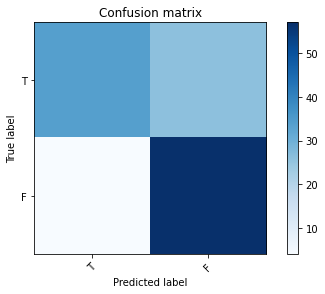

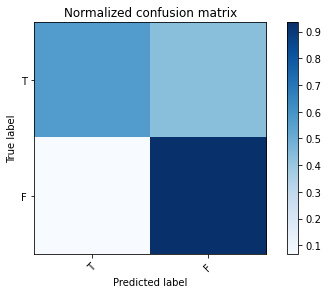

In [81]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [82]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [83]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.07 0.94 0.99 0.99 0.91 0.48 0.18 0.58 0.9  0.07 0.9  0.01 0.31 0.76
 0.01 0.89 0.19 0.05 0.61 0.79 0.99 0.93 0.96 0.81 0.01 0.01 0.01 0.06
 0.89 0.01 0.89 0.99 0.02 0.01 0.78 0.01 0.97 0.75 0.82 0.04 0.09 0.04
 0.92 0.92 0.8  0.43 0.88 0.99 0.98 0.52 0.98 0.91 0.88 0.35 0.99 0.99
 0.87 0.9  0.05 0.12 0.88 0.01 0.84 0.01 0.99 0.99 0.69 0.99 0.06 0.64
 0.99 0.99 0.93 0.45 0.01 0.99 0.3  0.92 0.96 0.3  0.01 0.74 0.99 0.01
 0.87 0.01 0.99 0.98 0.9  0.99 0.03 0.99 0.88 0.67 0.66 0.8  0.98 0.98
 0.95 0.93 0.79 0.91 0.26 0.62 0.93 0.99 0.21 0.31 0.98 0.92 0.76 0.02
 0.51 0.54 0.01 0.98 0.95 0.83 0.99 0.99 0.99 0.01 0.99 0.81 0.99 0.99
 0.4  0.01 0.51 0.9  0.01 0.96 0.01 0.34 0.86 0.17 0.87 0.26 0.1  0.58
 0.95 0.99 0.79 0.97 0.98 0.1  0.01 0.01 0.07 0.98 0.05 0.98 0.88 0.04
 0.05 0.63 0.21 0.99 0.83 0.99 0.01 0.1  0.14 0.85 0.99 0.99 0.58 0.99
 0.91 0.87 0.61 0.87 0.94 0.98 0.32 0.99 0.93 0.99 0.9  0.29 0.08 0.84
 0.01 0.99 0.01 0.99 0.99 0.69 0.85 0.01 0.66 0.99 0.97 0.81 0.31 0.06
 0.84 

In [84]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
399  1   0.99       1
299  1   0.99       1
225  1   0.99       1
229  1   0.99       1
239  0   0.99       1
..  ..    ...     ...
204  0   0.01      10
189  0   0.01      10
184  0   0.01      10
160  0   0.01      10
182  0   0.01      10

[484 rows x 3 columns]

In [85]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       36   49.0
2       38   48.0
3       30   48.0
4       31   49.0
5       32   48.0
6       32   48.0
7       29   49.0
8       11   48.0
9        3   48.0
10       2   49.0

In [86]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       36   49.0  0.734694
2       38   48.0  0.791667
3       30   48.0  0.625000
4       31   49.0  0.632653
5       32   48.0  0.666667
6       32   48.0  0.666667
7       29   49.0  0.591837
8       11   48.0  0.229167
9        3   48.0  0.062500
10       2   49.0  0.040816

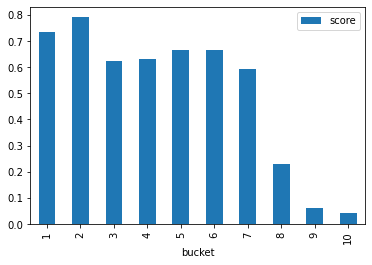

In [87]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [88]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [89]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.7230374691946901


### Median

In [90]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size = 0.4, random_state = 10)

dtree = DecisionTreeClassifier(random_state=17, max_depth=3, min_samples_leaf=2)
dtree.fit(X=X_train, y=y_train)

print("trained Model: ", dtree, "\n")

# Apply the learner to the new, unclassified observation.
y_pred = dtree.predict(X_test)
print(y_pred, "\n")

# view the model's score, which will indicate how good my model has been trained
print("Score: ", dtree.score(X_test, y_test))

trained Model:  DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=17) 

[0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 1] 

Score:  0.743801652892562


In [91]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = dtree.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[0.89 0.11]
 [0.05 0.95]
 [0.05 0.95]
 [0.29 0.71]
 [0.65 0.35]
 [1.   0.  ]
 [0.89 0.11]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.97 0.03]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.97 0.03]
 [0.97 0.03]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.05 0.95]
 [0.65 0.35]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.97 0.03]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.29 0.71]
 [0.29 0.71]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.65 0.35]
 [0.05 0.95]
 [0.29 0.71]
 [0.97 0.03]
 [0.97 0.03]
 [0.29 0.71]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.65 0.35]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.29 0.71]
 [0.65 0.35]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.29 0.71]
 [0.29 0.71]
 [0.97 0.03]
 [0.29 0.71]
 [0.97 0.03]

Confusion matrix, without normalization
[[38 22]
 [ 9 52]]
Normalized confusion matrix
[[0.63 0.37]
 [0.15 0.85]]


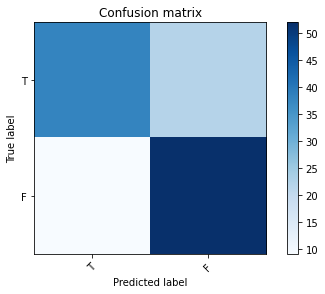

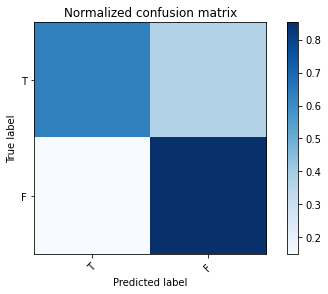

In [92]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [93]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.743801652892562
recall: 0.8524590163934426
precision: 0.7027027027027027
f1: 0.7703703703703704


#### ROC AUC 

In [94]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.89 0.11]
 [0.05 0.95]
 [0.05 0.95]
 [0.29 0.71]
 [0.65 0.35]
 [1.   0.  ]
 [0.89 0.11]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.97 0.03]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.97 0.03]
 [0.97 0.03]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.05 0.95]
 [0.65 0.35]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.97 0.03]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.29 0.71]
 [0.29 0.71]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.65 0.35]
 [0.05 0.95]
 [0.29 0.71]
 [0.97 0.03]
 [0.97 0.03]
 [0.29 0.71]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.65 

In [95]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 52 (85%)
True Negative (TN, specificity): 36 (60%)
False Positive (FP): 24 (40%)
False Negative (FN): 9 (14%)


In [96]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7272727272727273
recall: 0.8524590163934426
precision: 0.6842105263157895
f1: 0.7591240875912408


Confusion matrix, without normalization
[[36 24]
 [ 9 52]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.15 0.85]]


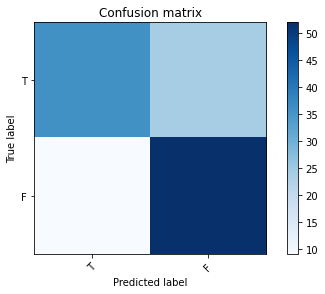

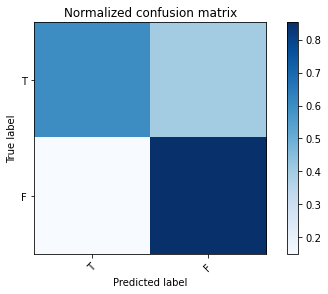

In [97]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [98]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0]
Y_HAT: [0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 0 0 0 1 1 1 1 0 1]
FPR: [0.   0.25 0.33 0.37 0.4  0.58 0.68 1.   1.  ]
TPR: [0.   0.57 0.74 0.85 0.85 0.9  0.93 0.95 1.  ]
thresholds: [1.95 0.95 0.71 0.7  0.5  0.35 0.11 0.03 0.  ]
Optimal threshold index: 3
Optimal threshold value: 0.7
AUC: 0.7323770491803279


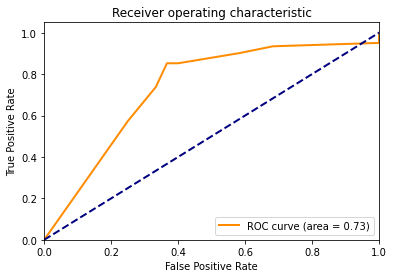

In [99]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [100]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.25 0.33 0.37 0.4  0.58 0.68 1.   1.  ]
TPR: [0.   0.57 0.74 0.85 0.85 0.9  0.93 0.95 1.  ]
thresholds: [1.95 0.95 0.71 0.7  0.5  0.35 0.11 0.03 0.  ]


In [101]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.7 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.89 0.11]
 [0.05 0.95]
 [0.05 0.95]
 [0.29 0.71]
 [0.65 0.35]
 [1.   0.  ]
 [0.89 0.11]
 [0.5  0.5 ]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.89 0.11]
 [0.05 0.95]
 [0.97 0.03]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.5  0.5 ]
 [0.97 0.03]
 [0.97 0.03]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.05 0.95]
 [0.65 0.35]
 [0.97 0.03]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.97 0.03]
 [0.65 0.35]
 [0.29 0.71]
 [0.05 0.95]
 [0.05 0.95]
 [0.89 0.11]
 [0.29 0.71]
 [0.29 0.71]
 [0.05 0.95]
 [0.3  0.7 ]
 [0.05 0.95]
 [0.05 0.95]
 [0.05 0.95]
 [0.97 0.03]
 [0.05 0.95]
 [0.65 0.35]
 [0.05 0.95]
 [0.29 0.71]
 [0.97 0.03]
 [0.97 0.03]
 [0.29 0.71]
 [0.89 0.11]
 [0.05 0.95]
 [0.65 0.35]
 [0.65 

In [102]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 52 (85%)
True Negative (TN, specificity): 38 (63%)
False Positive (FP): 22 (36%)
False Negative (FN): 9 (14%)


In [103]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.743801652892562
recall: 0.8524590163934426
precision: 0.7027027027027027
f1: 0.7703703703703704


Confusion matrix, without normalization
[[38 22]
 [ 9 52]]
Normalized confusion matrix
[[0.63 0.37]
 [0.15 0.85]]


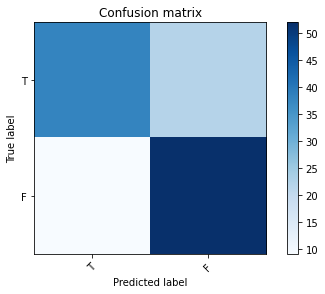

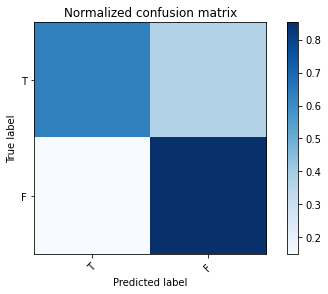

In [104]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [105]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [106]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.16 0.94 0.99 0.86 0.33 0.01 0.27 0.58 0.9  0.16 0.9  0.3  0.73 0.76
 0.01 0.89 0.01 0.06 0.61 0.21 0.99 0.93 0.96 0.81 0.01 0.51 0.01 0.07
 0.89 0.01 0.89 0.99 0.35 0.01 0.78 0.23 0.97 0.75 0.82 0.13 0.1  0.37
 0.7  0.92 0.8  0.04 0.66 0.82 0.98 0.52 0.98 0.91 0.88 0.09 0.99 0.44
 0.87 0.68 0.06 0.13 0.66 0.09 0.84 0.23 0.43 0.99 0.69 0.81 0.39 0.64
 0.99 0.99 0.71 0.87 0.01 0.79 0.04 0.92 0.96 0.01 0.33 0.74 0.99 0.01
 0.87 0.01 0.8  0.98 0.9  0.99 0.04 0.81 0.88 0.67 0.66 0.8  0.98 0.98
 0.95 0.93 0.57 0.91 0.01 0.62 0.93 0.99 0.22 0.05 0.98 0.34 0.76 0.11
 0.01 0.28 0.33 0.98 0.95 0.83 0.99 0.43 0.79 0.02 0.99 0.81 0.77 0.57
 0.01 0.05 0.51 0.9  0.01 0.96 0.24 0.76 0.86 0.26 0.87 0.01 0.11 0.58
 0.37 0.99 0.79 0.97 0.98 0.11 0.38 0.01 0.08 0.98 0.06 0.98 0.88 0.37
 0.06 0.63 0.54 0.99 0.83 0.99 0.01 0.11 0.47 0.63 0.99 0.99 0.19 0.9
 0.69 0.87 0.61 0.87 0.94 0.98 0.06 0.99 0.35 0.99 0.68 0.3  0.09 0.62
 0.01 0.99 0.33 0.42 0.99 0.69 0.63 0.2  0.66 0.99 0.97 0.59 0.73 0.07
 0.62 0

In [107]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
118  0   0.99       1
272  1   0.99       1
159  1   0.99       1
434  1   0.99       1
433  1   0.99       1
..  ..    ...     ...
126  1   0.01      10
227  0   0.01      10
396  0   0.01      10
348  0   0.01      10
380  0   0.01      10

[484 rows x 3 columns]

In [108]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       36   49.0
2       39   48.0
3       27   48.0
4       37   49.0
5       32   48.0
6       30   48.0
7       17   49.0
8        5   48.0
9       11   48.0
10      10   49.0

In [109]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       36   49.0  0.734694
2       39   48.0  0.812500
3       27   48.0  0.562500
4       37   49.0  0.755102
5       32   48.0  0.666667
6       30   48.0  0.625000
7       17   49.0  0.346939
8        5   48.0  0.104167
9       11   48.0  0.229167
10      10   49.0  0.204082

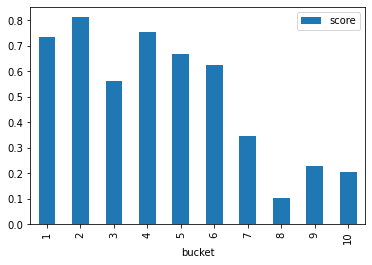

In [110]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [111]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [112]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 1.5152060500196904


## NAIVE BAYES
### Mean

In [113]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size = 0.4, random_state = 10)

clf = GaussianNB()
trained = clf.fit(X_train, y_train)
print ("Trained Model:", trained, "\n")

# Apply the learner to the new, unclassified observation.
y_pred = clf.predict(X_test)
print(y_pred, "\n")

# view the model's score, which will indicate how good my model has been trained
print("Score : ", accuracy_score(y_test, y_pred, normalize = True))

Trained Model: GaussianNB() 

[0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 1] 

Score :  0.7520661157024794


In [114]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.74 0.26]
 [0.03 0.97]
 [0.89 0.11]
 [0.   1.  ]
 [0.07 0.93]
 [0.24 0.76]
 [0.65 0.35]
 [0.35 0.65]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.18 0.82]
 [0.   1.  ]
 [0.09 0.91]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.81 0.19]
 [0.99 0.01]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.81 0.19]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.05 0.95]
 [0.09 0.91]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.25 0.75]
 [1.   0.  ]
 [0.   1.  ]
 [0.12 0.88]
 [0.74 0.26]
 [0.03 0.97]
 [1.   0.  ]
 [0.08 0.92]
 [0.04 0.96]
 [0.1  0.9 ]
 [0.37 0.63]
 [0.16 0.84]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]

Confusion matrix, without normalization
[[40 20]
 [10 51]]
Normalized confusion matrix
[[0.67 0.33]
 [0.16 0.84]]


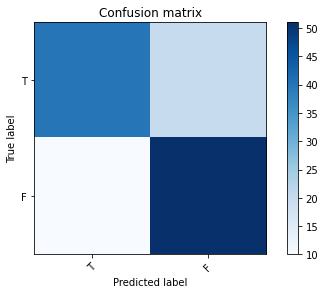

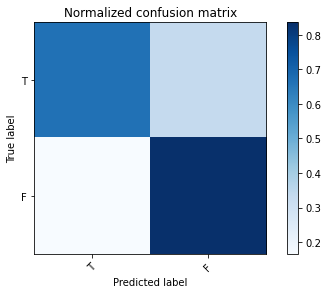

In [115]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [116]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuracy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7520661157024794
recall: 0.8360655737704918
precision: 0.7183098591549296
f1: 0.7727272727272727


#### ROC AUC 

In [117]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.74 0.26]
 [0.03 0.97]
 [0.89 0.11]
 [0.   1.  ]
 [0.07 0.93]
 [0.24 0.76]
 [0.65 0.35]
 [0.35 0.65]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.18 0.82]
 [0.   1.  ]
 [0.09 0.91]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.81 0.19]
 [0.99 0.01]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.81 0.19]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.05 0.95]
 [0.09 0.91]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.25 0.75]
 [1.   0.  ]
 [0.   

In [118]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 51 (83%)
True Negative (TN, specificity): 40 (66%)
False Positive (FP): 20 (33%)
False Negative (FN): 10 (16%)


In [119]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7520661157024794
recall: 0.8360655737704918
precision: 0.7183098591549296
f1: 0.7727272727272727


Confusion matrix, without normalization
[[40 20]
 [10 51]]
Normalized confusion matrix
[[0.67 0.33]
 [0.16 0.84]]


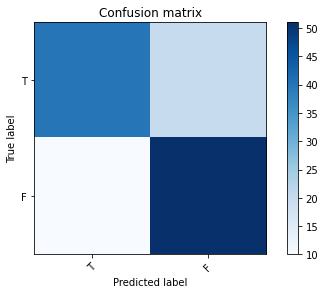

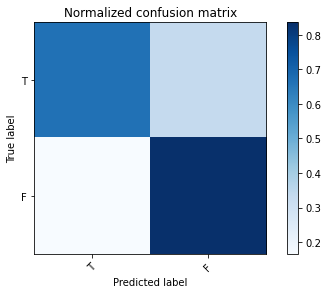

In [120]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [121]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0]
Y_HAT: [0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 1]
FPR: [0.   0.02 0.05 0.07 0.1  0.1  0.1  0.1  0.12 0.15 0.17 0.17 0.2  0.23
 0.25 0.25 0.3  0.32 0.32 0.35 0.35 0.37 0.37 0.38 0.38 0.42 0.48 0.5
 0.63 1.  ]
TPR: [0.   0.38 0.48 0.52 0.56 0.57 0.62 0.64 0.64 0.66 0.67 0.75 0.75 0.79
 0.79 0.8  0.8  0.82 0.84 0.84 0.85 0.85 0.89 0.89 0.95 0.95 0.95 0.97
 0.98 1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.84 0.82 0.77
 0.76 0.75 0.65 0.63 0.6  0.49 0.48 0.44 0.38 0.35 0.19 0.11 0.05 0.04
 0.01 0.  ]
Optimal thres

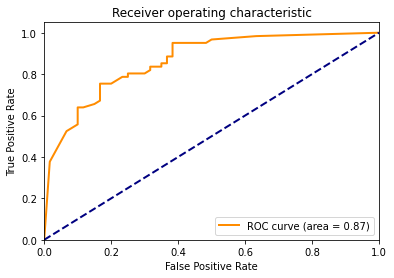

In [122]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [123]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.02 0.05 0.07 0.1  0.1  0.1  0.1  0.12 0.15 0.17 0.17 0.2  0.23
 0.25 0.25 0.3  0.32 0.32 0.35 0.35 0.37 0.37 0.38 0.38 0.42 0.48 0.5
 0.63 1.  ]
TPR: [0.   0.38 0.48 0.52 0.56 0.57 0.62 0.64 0.64 0.66 0.67 0.75 0.75 0.79
 0.79 0.8  0.8  0.82 0.84 0.84 0.85 0.85 0.89 0.89 0.95 0.95 0.95 0.97
 0.98 1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.95 0.94 0.93 0.92 0.91 0.84 0.82 0.77
 0.76 0.75 0.65 0.63 0.6  0.49 0.48 0.44 0.38 0.35 0.19 0.11 0.05 0.04
 0.01 0.  ]


In [124]:
print(y_pred_proba)

[[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.74 0.26]
 [0.03 0.97]
 [0.89 0.11]
 [0.   1.  ]
 [0.07 0.93]
 [0.24 0.76]
 [0.65 0.35]
 [0.35 0.65]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.18 0.82]
 [0.   1.  ]
 [0.09 0.91]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.81 0.19]
 [0.99 0.01]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.81 0.19]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.05 0.95]
 [0.09 0.91]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.25 0.75]
 [1.   0.  ]
 [0.   1.  ]
 [0.12 0.88]
 [0.74 0.26]
 [0.03 0.97]
 [1.   0.  ]
 [0.08 0.92]
 [0.04 0.96]
 [0.1  0.9 ]
 [0.37 0.63]
 [0.16 0.84]
 [1.   0.  ]
 [0.02 0.98]
 [0.99 0.01]

In [125]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.84 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.74 0.26]
 [0.03 0.97]
 [0.89 0.11]
 [0.   1.  ]
 [0.07 0.93]
 [0.24 0.76]
 [0.65 0.35]
 [0.35 0.65]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.18 0.82]
 [0.   1.  ]
 [0.09 0.91]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.81 0.19]
 [0.99 0.01]
 [1.   0.  ]
 [0.11 0.89]
 [1.   0.  ]
 [0.81 0.19]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.05 0.95]
 [0.   1.  ]
 [0.94 0.06]
 [0.   1.  ]
 [0.05 0.95]
 [0.09 0.91]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.01 0.99]
 [0.25 0.75]
 [1.   0.  ]
 [0.   

In [126]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 46 (75%)
True Negative (TN, specificity): 50 (83%)
False Positive (FP): 10 (16%)
False Negative (FN): 15 (24%)


In [127]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7933884297520661
recall: 0.7540983606557377
precision: 0.8214285714285714
f1: 0.7863247863247863


Confusion matrix, without normalization
[[50 10]
 [15 46]]
Normalized confusion matrix
[[0.83 0.17]
 [0.25 0.75]]


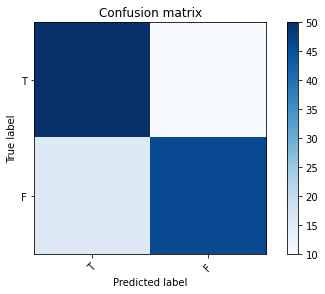

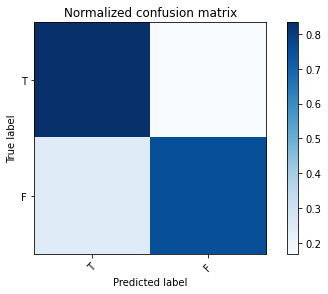

In [128]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [129]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [130]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.1  0.99 0.07 0.99 0.01 0.24 0.99 0.19 0.95 0.98 0.71 0.3  0.67 0.81
 0.01 0.94 0.01 0.03 0.88 0.68 0.99 0.89 0.93 0.85 0.01 0.01 0.01 0.04
 0.94 0.01 0.94 0.38 0.01 0.01 0.97 0.01 0.21 0.77 0.86 0.08 0.07 0.03
 0.97 0.71 0.85 0.49 0.95 0.99 0.95 0.2  0.99 0.91 0.93 0.12 0.99 0.99
 0.83 0.96 0.03 0.1  0.94 0.97 0.64 0.01 0.99 0.99 0.25 0.99 0.04 0.86
 0.99 0.99 0.63 0.99 0.01 0.99 0.02 0.95 0.02 0.28 0.01 0.99 0.99 0.01
 0.87 0.01 0.99 0.99 0.44 0.99 0.01 0.99 0.76 0.41 0.96 0.01 0.99 0.82
 0.7  0.97 0.46 0.96 0.09 0.71 0.75 0.05 0.19 0.02 0.99 0.62 0.81 0.01
 0.05 0.29 0.01 0.44 0.98 0.82 0.12 0.93 0.85 0.01 0.99 0.01 0.99 0.22
 0.16 0.91 0.12 0.95 0.77 0.77 0.24 0.7  0.91 0.15 0.92 0.01 0.08 0.85
 0.84 0.99 0.75 0.94 0.99 0.08 0.01 0.01 0.05 0.99 0.03 0.99 0.12 0.03
 0.03 0.82 0.19 0.24 0.85 0.99 0.01 0.08 0.13 0.9  0.84 0.99 0.64 0.99
 0.98 0.84 0.29 0.92 0.94 0.99 0.09 0.99 0.95 0.99 0.96 0.27 0.06 0.9
 0.88 0.8  0.01 0.99 0.93 0.25 0.89 0.01 0.88 0.99 0.92 0.51 0.86 0.04
 0.89 0

In [131]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
173  1   0.99       1
293  1   0.99       1
108  1   0.99       1
434  1   0.99       1
397  1   0.99       1
..  ..    ...     ...
227  0   0.01      10
398  0   0.01      10
228  0   0.01      10
396  0   0.01      10
347  0   0.01      10

[484 rows x 3 columns]

In [132]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       42   49.0
2       41   48.0
3       38   48.0
4       35   49.0
5       32   48.0
6       18   48.0
7       25   49.0
8        5   48.0
9        5   48.0
10       3   49.0

In [133]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       42   49.0  0.857143
2       41   48.0  0.854167
3       38   48.0  0.791667
4       35   49.0  0.714286
5       32   48.0  0.666667
6       18   48.0  0.375000
7       25   49.0  0.510204
8        5   48.0  0.104167
9        5   48.0  0.104167
10       3   49.0  0.061224

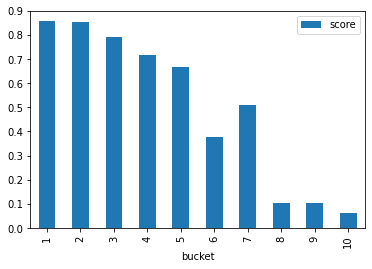

In [134]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [135]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [136]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 1.1112545612072136


### Median

In [137]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size = 0.4, random_state = 10)

clf = GaussianNB()
trained = clf.fit(X_train, y_train)
print ("Trained Model:", trained, "\n")

# Apply the learner to the new, unclassified observation.
y_pred = clf.predict(X_test)
print(y_pred, "\n")

# view the model's score, which will indicate how good my model has been trained
print("Score : ", accuracy_score(y_test, y_pred, normalize = True))

Trained Model: GaussianNB() 

[0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 1] 

Score :  0.743801652892562


In [138]:
# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained.predict_proba(X_test).round(2)
print(y_pred_proba, "\n")

[[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.78 0.22]
 [0.03 0.97]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.07 0.93]
 [0.26 0.74]
 [0.34 0.66]
 [0.38 0.62]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.2  0.8 ]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.58 0.42]
 [0.99 0.01]
 [1.   0.  ]
 [0.13 0.87]
 [1.   0.  ]
 [0.86 0.14]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.06 0.94]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.05 0.95]
 [0.11 0.89]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.02 0.98]
 [0.32 0.68]
 [1.   0.  ]
 [0.   1.  ]
 [0.14 0.86]
 [0.79 0.21]
 [0.03 0.97]
 [0.99 0.01]
 [0.09 0.91]
 [0.04 0.96]
 [0.11 0.89]
 [0.41 0.59]
 [0.18 0.82]
 [1.   0.  ]
 [0.03 0.97]
 [0.99 0.01]

Confusion matrix, without normalization
[[39 21]
 [10 51]]
Normalized confusion matrix
[[0.65 0.35]
 [0.16 0.84]]


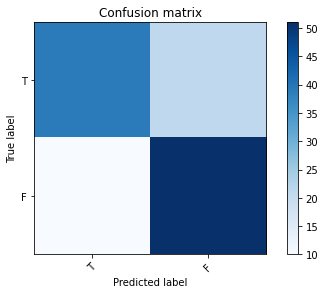

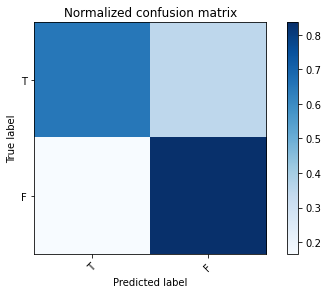

In [139]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [140]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.743801652892562
recall: 0.8360655737704918
precision: 0.7083333333333334
f1: 0.7669172932330828


#### ROC AUC 

In [141]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.78 0.22]
 [0.03 0.97]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.07 0.93]
 [0.26 0.74]
 [0.34 0.66]
 [0.38 0.62]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.2  0.8 ]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.58 0.42]
 [0.99 0.01]
 [1.   0.  ]
 [0.13 0.87]
 [1.   0.  ]
 [0.86 0.14]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.06 0.94]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.05 0.95]
 [0.11 0.89]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.02 0.98]
 [0.32 0.68]
 [1.   0.  ]
 [0.   

In [142]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 51 (83%)
True Negative (TN, specificity): 39 (65%)
False Positive (FP): 21 (35%)
False Negative (FN): 10 (16%)


In [143]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.743801652892562
recall: 0.8360655737704918
precision: 0.7083333333333334
f1: 0.7669172932330828


Confusion matrix, without normalization
[[39 21]
 [10 51]]
Normalized confusion matrix
[[0.65 0.35]
 [0.16 0.84]]


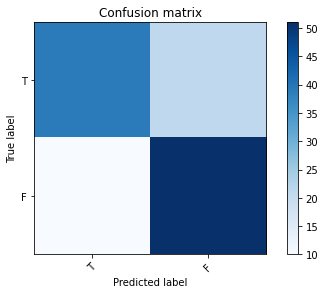

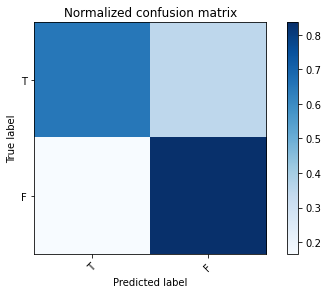

In [144]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [145]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0]
Y_HAT: [0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 0 0 0 0 0 1 1 0 1 1]
FPR: [0.   0.02 0.05 0.07 0.1  0.1  0.1  0.12 0.13 0.15 0.15 0.17 0.17 0.22
 0.22 0.27 0.27 0.33 0.33 0.37 0.37 0.38 0.38 0.42 0.43 0.47 0.48 0.52
 0.67 1.  ]
TPR: [0.   0.36 0.48 0.49 0.56 0.57 0.64 0.64 0.66 0.66 0.67 0.69 0.75 0.75
 0.77 0.77 0.8  0.8  0.84 0.84 0.9  0.9  0.95 0.95 0.95 0.95 0.97 0.97
 0.98 1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.94 0.93 0.92 0.91 0.9  0.89 0.82 0.79
 0.76 0.74 0.68 0.6  0.57 0.48 0.38 0.36 0.14 0.1  0.06 0.05 0.04 0.03
 0.01 0.  ]
Optimal thre

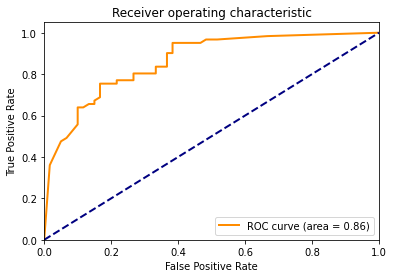

In [146]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [147]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.02 0.05 0.07 0.1  0.1  0.1  0.12 0.13 0.15 0.15 0.17 0.17 0.22
 0.22 0.27 0.27 0.33 0.33 0.37 0.37 0.38 0.38 0.42 0.43 0.47 0.48 0.52
 0.67 1.  ]
TPR: [0.   0.36 0.48 0.49 0.56 0.57 0.64 0.64 0.66 0.66 0.67 0.69 0.75 0.75
 0.77 0.77 0.8  0.8  0.84 0.84 0.9  0.9  0.95 0.95 0.95 0.95 0.97 0.97
 0.98 1.  ]
thresholds: [2.   1.   0.99 0.98 0.97 0.96 0.94 0.93 0.92 0.91 0.9  0.89 0.82 0.79
 0.76 0.74 0.68 0.6  0.57 0.48 0.38 0.36 0.14 0.1  0.06 0.05 0.04 0.03
 0.01 0.  ]


In [148]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.82 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 204    0
154    1
228    0
126    1
183    0
      ..
6      1
55     1
246    0
151    1
244    0
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.95 0.05]
 [0.   1.  ]
 [0.99 0.01]
 [0.01 0.99]
 [1.   0.  ]
 [0.78 0.22]
 [0.03 0.97]
 [0.9  0.1 ]
 [0.   1.  ]
 [0.07 0.93]
 [0.26 0.74]
 [0.34 0.66]
 [0.38 0.62]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.03 0.97]
 [0.2  0.8 ]
 [0.   1.  ]
 [0.1  0.9 ]
 [0.08 0.92]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.58 0.42]
 [0.99 0.01]
 [1.   0.  ]
 [0.13 0.87]
 [1.   0.  ]
 [0.86 0.14]
 [0.03 0.97]
 [0.01 0.99]
 [0.94 0.06]
 [1.   0.  ]
 [0.99 0.01]
 [0.02 0.98]
 [0.26 0.74]
 [0.   1.  ]
 [0.44 0.56]
 [0.   1.  ]
 [0.   1.  ]
 [0.08 0.92]
 [0.62 0.38]
 [0.   1.  ]
 [0.06 0.94]
 [0.   1.  ]
 [0.95 0.05]
 [0.   1.  ]
 [0.05 0.95]
 [0.11 0.89]
 [0.01 0.99]
 [1.   0.  ]
 [1.   0.  ]
 [0.01 0.99]
 [0.02 0.98]
 [0.32 0.68]
 [1.   0.  ]
 [0.   

In [149]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 61
Negative count: 60
Count: 121
True Positive (TP, sensativity): 46 (75%)
True Negative (TN, specificity): 50 (83%)
False Positive (FP): 10 (16%)
False Negative (FN): 15 (24%)


In [150]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.7933884297520661
recall: 0.7540983606557377
precision: 0.8214285714285714
f1: 0.7863247863247863


Confusion matrix, without normalization
[[50 10]
 [15 46]]
Normalized confusion matrix
[[0.83 0.17]
 [0.25 0.75]]


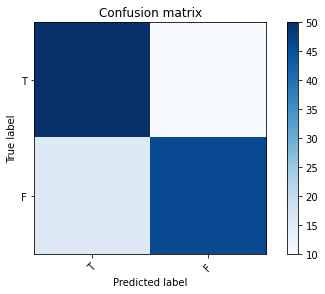

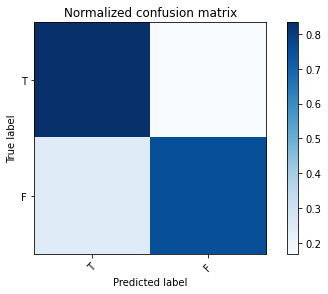

In [151]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [152]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [153]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.1  0.99 0.07 0.99 0.01 0.2  0.99 0.18 0.95 0.98 0.69 0.61 0.64 0.81
 0.01 0.94 0.01 0.03 0.88 0.66 0.99 0.88 0.93 0.85 0.01 0.01 0.01 0.04
 0.94 0.01 0.94 0.61 0.01 0.01 0.95 0.01 0.16 0.77 0.86 0.08 0.07 0.03
 0.97 0.71 0.85 0.49 0.95 0.99 0.95 0.2  0.99 0.9  0.93 0.11 0.99 0.99
 0.81 0.96 0.03 0.1  0.94 0.96 0.57 0.01 0.99 0.99 0.2  0.99 0.05 0.85
 0.99 0.99 0.59 0.98 0.01 0.99 0.02 0.96 0.02 0.25 0.01 0.99 0.99 0.01
 0.87 0.01 0.99 0.99 0.43 0.99 0.01 0.99 0.74 0.33 0.96 0.01 0.99 0.82
 0.67 0.97 0.43 0.96 0.07 0.65 0.74 0.05 0.2  0.02 0.99 0.59 0.81 0.01
 0.05 0.28 0.01 0.43 0.97 0.82 0.14 0.91 0.82 0.01 0.99 0.01 0.99 0.22
 0.12 0.91 0.11 0.95 0.77 0.75 0.55 0.67 0.91 0.15 0.92 0.01 0.08 0.85
 0.82 0.99 0.74 0.94 0.99 0.08 0.01 0.01 0.05 0.99 0.03 0.99 0.35 0.03
 0.03 0.8  0.19 0.19 0.85 0.99 0.01 0.08 0.13 0.9  0.84 0.99 0.64 0.99
 0.98 0.84 0.29 0.92 0.93 0.99 0.08 0.99 0.95 0.99 0.96 0.27 0.06 0.9
 0.87 0.73 0.01 0.99 0.91 0.2  0.89 0.01 0.87 0.99 0.91 0.47 0.84 0.04
 0.88 0

In [154]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
173  1   0.99       1
82   1   0.99       1
302  0   0.99       1
350  1   0.99       1
96   1   0.99       1
..  ..    ...     ...
223  0   0.01      10
227  0   0.01      10
398  0   0.01      10
228  0   0.01      10
348  0   0.01      10

[484 rows x 3 columns]

In [155]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       39   49.0
2       45   48.0
3       37   48.0
4       36   49.0
5       29   48.0
6       20   48.0
7       25   49.0
8        5   48.0
9        5   48.0
10       3   49.0

In [156]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       39   49.0  0.795918
2       45   48.0  0.937500
3       37   48.0  0.770833
4       36   49.0  0.734694
5       29   48.0  0.604167
6       20   48.0  0.416667
7       25   49.0  0.510204
8        5   48.0  0.104167
9        5   48.0  0.104167
10       3   49.0  0.061224

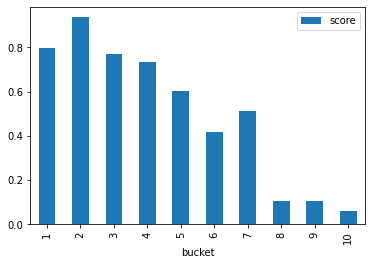

In [157]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [158]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [159]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 1.1106203966238264


## KNN

### Mean

In [160]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.4, random_state = 495)

# Convert DataFrame data into np.arrays
# The scikit-learn library requires the data be formatted as a numpy array.
# Here are doing the reformatting
X = np.array(X_train)
print(X, X.shape, "\n")

y = np.array(y_train)
print(y, y.shape, "\n")

clf = neighbors.KNeighborsClassifier(12, weights='uniform')
trained_model = clf.fit(X, y)
print ("Trained Model:", trained_model, "\n")

# view the model's score, which will indicate how good my model has been trained
print ("Score = ", trained_model.score(X, y), "\n")

# Apply the learner to the new, unclassified observation.
y_pred = trained_model.predict(X_test)
print(y_pred, "\n")

# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained_model.predict_proba(X_test)
print(y_pred_proba, "\n")

[[-0.16  0.68 -0.94 ... -2.27 -0.75  1.15]
 [ 0.29  0.68  1.01 ...  0.98  0.69  1.15]
 [-2.15 -1.46 -0.94 ...  0.98 -0.75 -0.57]
 ...
 [-2.15  0.68 -0.94 ... -0.65 -0.75  1.15]
 [ 1.17 -1.46 -0.94 ... -0.65  0.28  1.15]
 [ 1.28 -1.46  1.01 ... -0.65  0.69 -0.57]] (181, 13) 

[0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1] (181,) 



NameError: name 'neighbors' is not defined

Confusion matrix, without normalization
[[46 13]
 [10 52]]
Normalized confusion matrix
[[0.78 0.22]
 [0.16 0.84]]


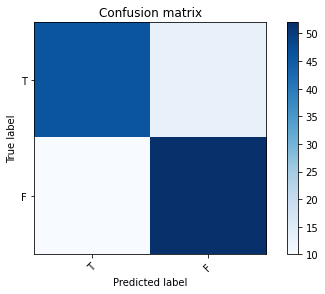

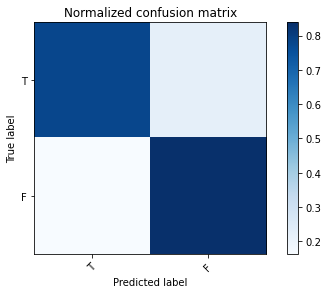

In [197]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [198]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8099173553719008
recall: 0.8387096774193549
precision: 0.8
f1: 0.8188976377952757


#### ROC AUC 

In [199]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.58 0.42]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.58 0.42]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.42 0.58]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.75 0.25]
 [0.92 0.08]
 [0.83 0.17]
 [0.58 0.42]
 [0.58 0.42]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [200]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 56 (90%)
True Negative (TN, specificity): 46 (77%)
False Positive (FP): 13 (22%)
False Negative (FN): 6 (9%)


In [201]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8429752066115702
recall: 0.9032258064516129
precision: 0.8115942028985508
f1: 0.8549618320610687


Confusion matrix, without normalization
[[46 13]
 [ 6 56]]
Normalized confusion matrix
[[0.78 0.22]
 [0.1  0.9 ]]


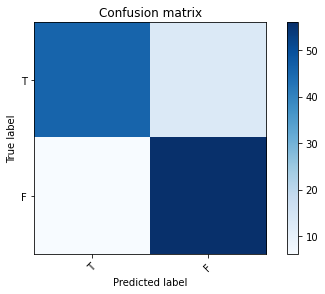

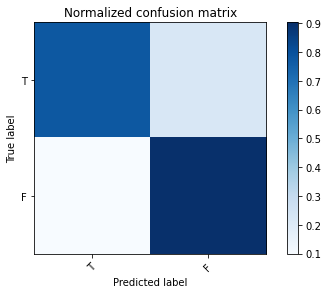

In [202]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [203]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
Y_HAT: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1]
FPR: [0.   0.03 0.1  0.12 0.15 0.22 0.22 0.37 0.47 0.51 0.71 0.83 1.  ]
TPR: [0.   0.26 0.47 0.61 0.73 0.77 0.9  0.94 0.95 0.98 1.   1.   1.  ]
thresholds: [2.   1.   0.92 0.83 0.75 0.67 0.5  0.42 0.33 0.25 0.17 0.08 0.  ]
Optimal threshold index: 6
Optimal threshold value: 0.5
AUC: 0.8705576817933297


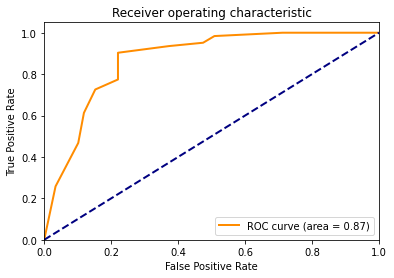

In [204]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [205]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.03 0.1  0.12 0.15 0.22 0.22 0.37 0.47 0.51 0.71 0.83 1.  ]
TPR: [0.   0.26 0.47 0.61 0.73 0.77 0.9  0.94 0.95 0.98 1.   1.   1.  ]
thresholds: [2.   1.   0.92 0.83 0.75 0.67 0.5  0.42 0.33 0.25 0.17 0.08 0.  ]


In [206]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.58 0.42]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.58 0.42]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.83 0.17]
 [0.42 0.58]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.5  0.5 ]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.75 0.25]
 [0.92 0.08]
 [0.83 0.17]
 [0.58 0.42]
 [0.58 0.42]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [207]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negatice count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negatice count: 59
Count: 121
True Positive (TP, sensativity): 56 (90%)
True Negative (TN, specificity): 46 (77%)
False Positive (FP): 13 (22%)
False Negative (FN): 6 (9%)


In [208]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8429752066115702
recall: 0.9032258064516129
precision: 0.8115942028985508
f1: 0.8549618320610687


Confusion matrix, without normalization
[[46 13]
 [ 6 56]]
Normalized confusion matrix
[[0.78 0.22]
 [0.1  0.9 ]]


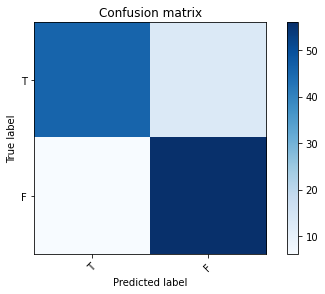

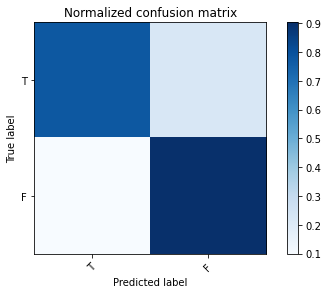

In [209]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [210]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [211]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.99 0.01 0.06 0.99 0.89 0.98 0.66 0.91 0.12 0.22 0.29 0.62 0.99 0.81
 0.08 0.86 0.32 0.99 0.24 0.28 0.98 0.64 0.99 0.52 0.36 0.99 0.63 0.45
 0.77 0.22 0.69 0.99 0.75 0.23 0.08 0.88 0.02 0.01 0.45 0.52 0.07 0.1
 0.01 0.89 0.27 0.84 0.04 0.94 0.95 0.32 0.2  0.04 0.02 0.14 0.99 0.09
 0.33 0.22 0.12 0.26 0.37 0.4  0.06 0.01 0.16 0.99 0.91 0.27 0.99 0.77
 0.7  0.99 0.91 0.32 0.01 0.58 0.59 0.97 0.93 0.72 0.81 0.95 0.99 0.95
 0.92 0.12 0.99 0.45 0.86 0.97 0.34 0.76 0.6  0.72 0.13 0.01 0.78 0.28
 0.99 0.73 0.19 0.29 0.88 0.75 0.82 0.87 0.86 0.02 0.86 0.58 0.01 0.33
 0.42 0.41 0.73 0.45 0.99 0.63 0.99 0.83 0.66 0.91 0.14 0.01 0.98 0.99
 0.9  0.44 0.84 0.12 0.01 0.34 0.56 0.99 0.91 0.4  0.84 0.38 0.99 0.21
 0.44 0.96 0.51 0.99 0.69 0.49 0.88 0.62 0.47 0.86 0.28 0.78 0.93 0.77
 0.36 0.01 0.99 0.05 0.05 0.65 0.4  0.08 0.2  0.01 0.99 0.46 0.99 0.27
 0.81 0.84 0.41 0.09 0.08 0.12 0.11 0.99 0.01 0.56 0.22 0.36 0.23 0.33
 0.31 0.21 0.01 0.15 0.99 0.91 0.08 0.85 0.79 0.75 0.94 0.79 0.18 0.21
 0.41 0

In [212]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
0    1   0.99       1
156  1   0.99       1
237  1   0.99       1
219  1   0.99       1
209  0   0.99       1
..  ..    ...     ...
337  0   0.01      10
415  0   0.01      10
163  0   0.01      10
184  0   0.01      10
37   0   0.01      10

[484 rows x 3 columns]

In [213]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       44   49.0
2       42   48.0
3       34   48.0
4       41   49.0
5       35   48.0
6       24   48.0
7       18   49.0
8        4   48.0
9        6   48.0
10       0   49.0

In [214]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       44   49.0  0.897959
2       42   48.0  0.875000
3       34   48.0  0.708333
4       41   49.0  0.836735
5       35   48.0  0.729167
6       24   48.0  0.500000
7       18   49.0  0.367347
8        4   48.0  0.083333
9        6   48.0  0.125000
10       0   49.0  0.000000

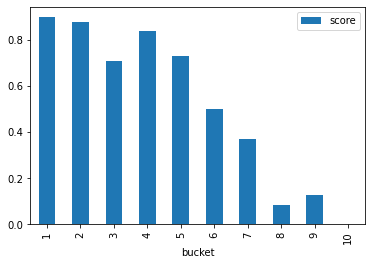

In [215]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [216]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [217]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.9667629915213856


### Median

In [218]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size=0.4, random_state = 495)

# Convert DataFrame data into np.arrays
# The scikit-learn library requires the data be formatted as a numpy array.
# Here are doing the reformatting
X = np.array(X_train)
print(X, X.shape, "\n")

y = np.array(y_train)
print(y, y.shape, "\n")

clf = neighbors.KNeighborsClassifier(12, weights='uniform')
trained_model = clf.fit(X, y)
print ("Trained Model:", trained_model, "\n")

# view the model's score, which will indicate how good my model has been trained
print ("Score = ", trained_model.score(X, y), "\n")

# Apply the learner to the new, unclassified observation.
y_pred = trained_model.predict(X_test)
print(y_pred, "\n")

# we can even look at the probabilities the learner assigned to each class
y_pred_proba = trained_model.predict_proba(X_test)
print(y_pred_proba, "\n")

[[-0.16  0.68 -0.94 ... -2.27 -0.66  1.15]
 [ 0.29  0.68  1.01 ...  0.98  0.75  1.15]
 [-2.15 -1.46 -0.94 ...  0.98 -0.66 -0.56]
 ...
 [-2.15  0.68 -0.94 ... -0.65 -0.66  1.15]
 [ 1.17 -1.46 -0.94 ... -0.65 -0.66  1.15]
 [ 1.28 -1.46  1.01 ... -0.65  0.75 -0.56]] (181, 13) 

[0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1] (181,) 

Trained Model: KNeighborsClassifier(n_neighbors=12) 

Score =  0.8342541436464088 

[1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1] 

[[0.   1.  ]
 

Confusion matrix, without normalization
[[45 14]
 [10 52]]
Normalized confusion matrix
[[0.76 0.24]
 [0.16 0.84]]


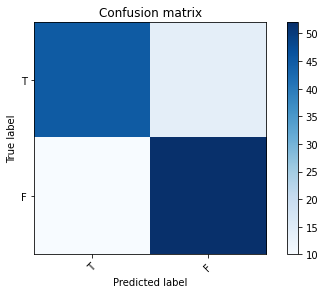

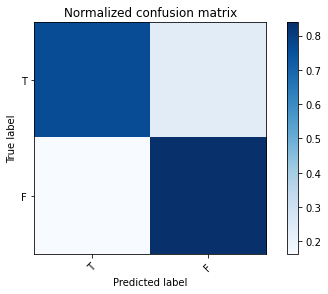

In [219]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [220]:
# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8016528925619835
recall: 0.8387096774193549
precision: 0.7878787878787878
f1: 0.8125


#### ROC AUC

In [221]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Random Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.67 0.33]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.42 0.58]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.33 0.67]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.58 0.42]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.67 0.33]
 [0.75 0.25]
 [0.75 0.25]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [222]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 55 (88%)
True Negative (TN, specificity): 44 (74%)
False Positive (FP): 15 (25%)
False Negative (FN): 7 (11%)


In [223]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8181818181818182
recall: 0.8870967741935484
precision: 0.7857142857142857
f1: 0.8333333333333333


Confusion matrix, without normalization
[[44 15]
 [ 7 55]]
Normalized confusion matrix
[[0.75 0.25]
 [0.11 0.89]]


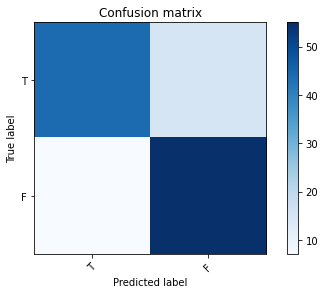

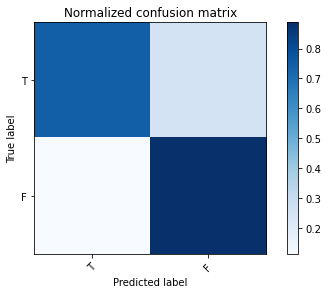

In [224]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

In [225]:
# Compute ROC curve and ROC area for each class
# tp_rate = float(tp)/count_pos
# fp_rate = float(fp)/count_neg

fpr, tpr, thresholds = roc_curve(y, y_pred_proba[:,1])

# Compute Area Under the Curve (AUC) using the trapezoidal rule
roc_auc = auc(fpr, tpr)
print(f"Y: {y}")
print(f"Y_HAT: {y_hat}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
Y_HAT: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 1 0 1 1 1 1 1]
FPR: [0.   0.03 0.1  0.12 0.15 0.22 0.25 0.36 0.51 0.59 0.73 0.83 1.  ]
TPR: [0.   0.27 0.44 0.63 0.73 0.79 0.89 0.94 0.95 1.   1.   1.   1.  ]
thresholds: [2.   1.   0.92 0.83 0.75 0.67 0.5  0.42 0.33 0.25 0.17 0.08 0.  ]
Optimal threshold index: 6
Optimal threshold value: 0.5
AUC: 0.8665937670858392


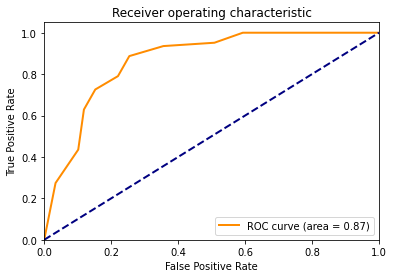

In [226]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")
plt.show()

In [227]:
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"thresholds: {thresholds}")

FPR: [0.   0.03 0.1  0.12 0.15 0.22 0.25 0.36 0.51 0.59 0.73 0.83 1.  ]
TPR: [0.   0.27 0.44 0.63 0.73 0.79 0.89 0.94 0.95 1.   1.   1.   1.  ]
thresholds: [2.   1.   0.92 0.83 0.75 0.67 0.5  0.42 0.33 0.25 0.17 0.08 0.  ]


In [228]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred_proba[:,1]})

THRESHOLD = 0.5 #Optimal Threshold Value

y = np.array(y_test)
y_hat = np.array([(1 if item >= THRESHOLD else 0) for item in y_pred_proba[:,1]])

print(f'y_test: {y_test}')
print(f'y_pred_proba: {y_pred_proba}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred_proba: [[0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.08 0.92]
 [0.08 0.92]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.17 0.83]
 [0.83 0.17]
 [0.83 0.17]
 [0.67 0.33]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.75 0.25]
 [0.08 0.92]
 [0.58 0.42]
 [0.   1.  ]
 [0.67 0.33]
 [0.67 0.33]
 [0.17 0.83]
 [0.33 0.67]
 [0.   1.  ]
 [0.33 0.67]
 [0.58 0.42]
 [0.   1.  ]
 [0.25 0.75]
 [0.42 0.58]
 [0.17 0.83]
 [0.75 0.25]
 [0.25 0.75]
 [0.   1.  ]
 [0.25 0.75]
 [0.67 0.33]
 [1.   0.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.75 0.25]
 [0.33 0.67]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.92 0.08]
 [1.   0.  ]
 [0.08 0.92]
 [0.58 0.42]
 [0.08 0.92]
 [0.92 0.08]
 [0.17 0.83]
 [0.08 0.92]
 [0.58 0.42]
 [0.83 0.17]
 [0.92 0.08]
 [0.92 0.08]
 [0.92 0.08]
 [0.   1.  ]
 [1.   0.  ]
 [0.58 0.42]
 [0.67 0.33]
 [0.75 0.25]
 [0.75 0.25]
 [0.58 0.42]
 [0.5  0.5 ]
 [0.83 0.17]
 [1.   0.  ]
 [0.92 

In [229]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 55 (88%)
True Negative (TN, specificity): 44 (74%)
False Positive (FP): 15 (25%)
False Negative (FN): 7 (11%)


In [230]:
ac = metrics.accuracy_score(y, y_hat)
precision = metrics.precision_score(y, y_hat)
recall = metrics.recall_score(y, y_hat)
f1 = metrics.f1_score(y, y_hat)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Accuarcy: 0.8181818181818182
recall: 0.8870967741935484
precision: 0.7857142857142857
f1: 0.8333333333333333


Confusion matrix, without normalization
[[44 15]
 [ 7 55]]
Normalized confusion matrix
[[0.75 0.25]
 [0.11 0.89]]


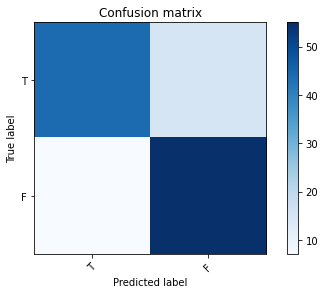

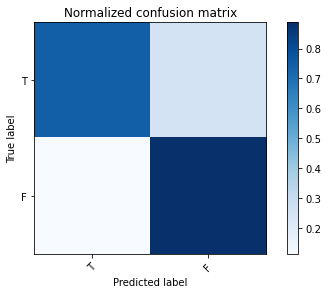

In [231]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

#### Decile Analysis

In [232]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [233]:
# Increase size and add a little noise
np.random.seed(42)
y = np.concatenate([y, y, y, y])
y_hat = np.concatenate([y_hat, y_hat, y_hat, y_hat])
y_hat = y_hat + np.random.normal(size = len(y_hat)) / 10
y_hat = np.clip(y_hat,0.01,0.99)
print(y_hat, len(y_hat))

[0.99 0.01 0.06 0.99 0.89 0.98 0.66 0.91 0.12 0.22 0.29 0.62 0.99 0.81
 0.08 0.86 0.32 0.99 0.24 0.19 0.98 0.64 0.99 0.52 0.36 0.99 0.63 0.62
 0.77 0.22 0.69 0.99 0.75 0.23 0.08 0.88 0.02 0.05 0.53 0.52 0.07 0.1
 0.01 0.89 0.27 0.84 0.04 0.94 0.95 0.24 0.2  0.04 0.02 0.14 0.99 0.09
 0.33 0.3  0.28 0.35 0.37 0.48 0.06 0.01 0.16 0.99 0.91 0.27 0.99 0.77
 0.7  0.99 0.91 0.41 0.01 0.58 0.68 0.97 0.84 0.72 0.81 0.87 0.99 0.95
 0.92 0.12 0.99 0.45 0.86 0.97 0.34 0.76 0.51 0.72 0.13 0.01 0.86 0.28
 0.99 0.73 0.19 0.37 0.88 0.75 0.82 0.87 0.86 0.02 0.86 0.58 0.06 0.33
 0.34 0.58 0.73 0.45 0.99 0.63 0.99 0.83 0.66 0.91 0.14 0.01 0.98 0.99
 0.9  0.44 0.84 0.12 0.01 0.34 0.56 0.99 0.91 0.4  0.84 0.38 0.99 0.21
 0.36 0.96 0.51 0.99 0.69 0.49 0.88 0.62 0.64 0.86 0.28 0.78 0.93 0.77
 0.36 0.01 0.99 0.05 0.13 0.73 0.4  0.08 0.2  0.01 0.99 0.46 0.99 0.27
 0.81 0.84 0.33 0.09 0.08 0.12 0.11 0.99 0.01 0.56 0.31 0.52 0.31 0.33
 0.39 0.21 0.01 0.15 0.99 0.91 0.08 0.85 0.79 0.75 0.99 0.79 0.27 0.21
 0.41 0

In [234]:
data = pd.DataFrame({'y':y,'y_hat':y_hat})
data.sort_values(by='y_hat',ascending = False, inplace = True)
data['bucket'] = pd.qcut(range(len(data)), 10, labels = False) + 1
data

y  y_hat  bucket
0    1   0.99       1
156  1   0.99       1
237  1   0.99       1
219  1   0.99       1
209  0   0.99       1
..  ..    ...     ...
415  0   0.01      10
426  0   0.01      10
95   0   0.01      10
74   0   0.01      10
365  0   0.01      10

[484 rows x 3 columns]

In [235]:
data.drop('y_hat', 1, inplace=True)
data['count'] = np.ones(len(data))
data = data.groupby(by='bucket').sum()
data

y  count
bucket           
1       44   49.0
2       42   48.0
3       34   48.0
4       41   49.0
5       36   48.0
6       21   48.0
7       16   49.0
8       10   48.0
9        3   48.0
10       1   49.0

In [236]:
data['score'] = data['y'].values / data['count'].values
data.columns = ['tp','count','score']
data

tp  count     score
bucket                     
1       44   49.0  0.897959
2       42   48.0  0.875000
3       34   48.0  0.708333
4       41   49.0  0.836735
5       36   48.0  0.750000
6       21   48.0  0.437500
7       16   49.0  0.326531
8       10   48.0  0.208333
9        3   48.0  0.062500
10       1   49.0  0.020408

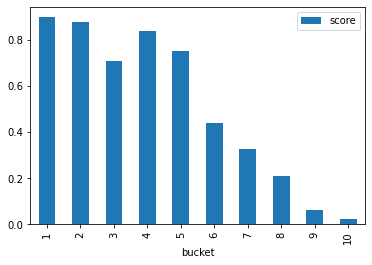

In [237]:
data.drop('count', 1, inplace=True)
data.drop('tp', 1, inplace=True)
data.plot(kind = "bar")

#### Log Loss

In [238]:
y = np.array(y_test)
y_hat = np.array(y_pred_proba[:,1])

In [239]:
llos = metrics.log_loss(y, y_hat)
print(f"Log loss: {llos}")

Log loss: 0.9738402136391761


## KMEANS
### Mean

In [240]:
X_train, X_test, y_train, y_test = train_test_split(meanheart.drop("target", axis = 1), meanheart.target, test_size=0.4, random_state = 495)

# initializing K-Means
model = KMeans(n_clusters=2)

# Fitting with the traning data inputs
kmeans_model = model.fit(X_train, y_train)

# predicting the clusters
y_pred = kmeans_model.predict(X_test)
print ("Predictions\n", y_pred)

Predictions
 [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [241]:
# Getting the cluster centers
C = kmeans_model.cluster_centers_
print (pd.DataFrame(C, columns = X_test.columns))

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.506972  0.343574 -0.309453  0.035840  0.090144  0.172762 -0.125608   
1 -0.247933 -0.196805  0.377358 -0.047086 -0.086252 -0.070759  0.176248   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.677638  0.647110  0.687748 -0.581675  0.455213  0.186311  
1  0.488416 -0.536035 -0.519941  0.468691 -0.229917 -0.234367  


In [242]:
#Score
print("Score :", kmeans_model.score(X_test, y_test), "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Score : -1360.6191878608547 

Accuarcy: 0.8099173553719008
recall: 0.8548387096774194
precision: 0.7910447761194029
f1: 0.8217054263565892


In [243]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred})

y = np.array(y_test)
y_hat = np.array(y_pred)

print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]
y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
yhat: [1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [244]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 53 (85%)
True Negative (TN, specificity): 45 (76%)
False Positive (FP): 14 (23%)
False Negative (FN): 9 (14%)


Confusion matrix, without normalization
[[45 14]
 [ 9 53]]
Normalized confusion matrix
[[0.76 0.24]
 [0.15 0.85]]


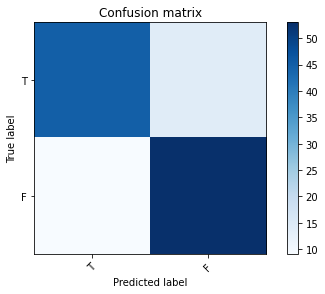

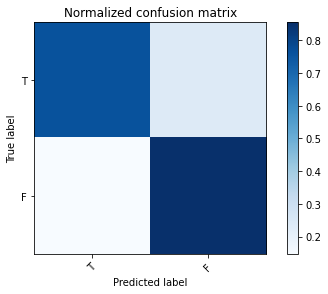

In [245]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

### Median

In [246]:
X_train, X_test, y_train, y_test = train_test_split(medianheart.drop("target", axis = 1), medianheart.target, test_size=0.4, random_state = 495)

# initializing K-Means
model = KMeans(n_clusters=2)

# Fitting with the traning data inputs
kmeans_model = model.fit(X_train, y_train)

# predicting the clusters
y_pred = kmeans_model.predict(X_test)
print ("Predictions\n", y_pred)

Predictions
 [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [247]:
# Getting the cluster centers
C = kmeans_model.cluster_centers_
print (pd.DataFrame(C, columns = X_test.columns))

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.383966  0.253152 -0.245032 -0.032297  0.050446  0.080796 -0.113916   
1 -0.242418 -0.190512  0.419309  0.009427 -0.075156 -0.017269  0.211123   

    thalach     exang   oldpeak     slope        ca      thal  
0 -0.584838  0.461487  0.601373 -0.627774  0.250963  0.219217  
1  0.576972 -0.534475 -0.615325  0.675878 -0.131817 -0.336264  


In [248]:
#Score
print("Score :", kmeans_model.score(X_test, y_test), "\n")

# Accuracy, Precision, Recall and F1 Score
ac = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"Accuarcy: {ac}")
print(f"recall: {recall}")
print(f"precision: {precision}")
print(f"f1: {f1}")

Score : -1371.377612651223 

Accuarcy: 0.7851239669421488
recall: 0.7903225806451613
precision: 0.7903225806451613
f1: 0.7903225806451614


In [249]:
classification = pd.DataFrame({'y': y_test, 'yhat': y_pred})

y = np.array(y_test)
y_hat = np.array(y_pred)

print(f'y_test: {y_test}')
print(f'y_pred: {y_pred}')
print(f'y: {y}')
print(f'yhat: {y_hat}')

y_test: 163    1
194    0
186    0
8      1
123    1
      ..
11     1
35     1
30     1
116    1
37     1
Name: target, Length: 121, dtype: int64
y_pred: [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]
y: [1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 1]
yhat: [1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 0 1 0 1 1 1]


In [250]:
count_pos = sum(y==1)
count_neg = sum(y==0)
count = len(y)
print(f'Positive count: {count_pos}')
print(f'Negative count: {count_neg}')
tp = sum(np.logical_and(y==1, y_hat==1))
tp_rate = float(tp)/count_pos
tn = sum(np.logical_and(y==0, y_hat==0))
tn_rate = float(tn)/count_neg
fp = sum(np.logical_and(y==0, y_hat==1))
fp_rate = float(fp)/count_neg
fn = sum(np.logical_and(y==1, y_hat==0))
fn_rate = float(fn)/count_pos

print(f'Count: {count}')
print(f'True Positive (TP, sensativity): {tp} ({int(tp_rate*100)}%)')
print(f'True Negative (TN, specificity): {tn} ({int(tn_rate*100)}%)')
print(f'False Positive (FP): {fp} ({int(fp_rate*100)}%)')
print(f'False Negative (FN): {fn} ({int(fn_rate*100)}%)')

Positive count: 62
Negative count: 59
Count: 121
True Positive (TP, sensativity): 49 (79%)
True Negative (TN, specificity): 46 (77%)
False Positive (FP): 13 (22%)
False Negative (FN): 13 (20%)


Confusion matrix, without normalization
[[46 13]
 [13 49]]
Normalized confusion matrix
[[0.78 0.22]
 [0.21 0.79]]


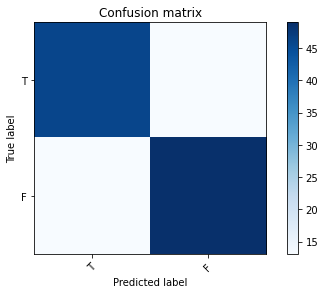

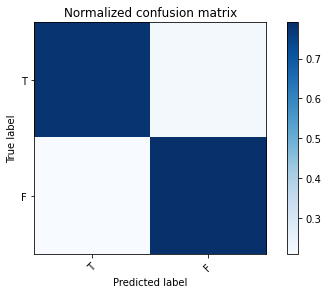

In [251]:
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title = 'Confusion matrix', cmap = plt.cm.Blues):
    # plt.imshow displays the image on the axes, but if you need to 
    # display multiple images you use show() to finish the figure.
    # interpolation = 'none': works well when a big image is scaled down
    # interpolation = 'nearest': works well when a small image is scaled up
    # cmap: The registered colormap name used to map scalar data to colors.
    plt.imshow(cm, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation = 45)
    plt.yticks(tick_marks, names)
    # Automatically adjust subplot parameters to give specified padding.
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

labels = ['T', 'F']

# Compute confusion matrix
cm = confusion_matrix(y, y_hat)
np.set_printoptions(precision = 2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, labels)

# Normalize the confusion matrix by row 
# (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, labels, title = 'Normalized confusion matrix')

plt.show()

# MODEL COMPARISON